# A SIMPLE-AUTOENCODER

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

C:\Users\Anup\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


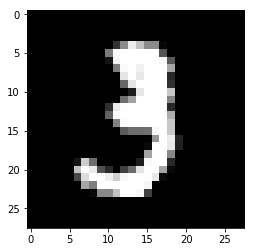

In [9]:
# plotting an example image
img = mnist.train.images[10]
plt.imshow(img.reshape(28,28), cmap='Greys_r')

In [17]:
# size of hidden layer (encoding layer)
encoding_dim = 64

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs') 
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu) 

# output layer logits, fully connected layer with no activation 
logits = tf.layers.dense(encoded, image_size, activation=None)

# sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)

# mean of the loss
cost = tf.reduce_mean(loss)

# optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

In [18]:
sess = tf.Session()

In [19]:
epochs = 100
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/100... Training loss: 0.6949
Epoch: 1/100... Training loss: 0.6879
Epoch: 1/100... Training loss: 0.6811
Epoch: 1/100... Training loss: 0.6732
Epoch: 1/100... Training loss: 0.6644
Epoch: 1/100... Training loss: 0.6525
Epoch: 1/100... Training loss: 0.6415
Epoch: 1/100... Training loss: 0.6261
Epoch: 1/100... Training loss: 0.6107
Epoch: 1/100... Training loss: 0.5904
Epoch: 1/100... Training loss: 0.5753
Epoch: 1/100... Training loss: 0.5517
Epoch: 1/100... Training loss: 0.5302
Epoch: 1/100... Training loss: 0.5063
Epoch: 1/100... Training loss: 0.4820
Epoch: 1/100... Training loss: 0.4586
Epoch: 1/100... Training loss: 0.4388
Epoch: 1/100... Training loss: 0.4177
Epoch: 1/100... Training loss: 0.4082
Epoch: 1/100... Training loss: 0.3782
Epoch: 1/100... Training loss: 0.3692
Epoch: 1/100... Training loss: 0.3574
Epoch: 1/100... Training loss: 0.3389
Epoch: 1/100... Training loss: 0.3352
Epoch: 1/100... Training loss: 0.3393
Epoch: 1/100... Training loss: 0.3157
Epoch: 1/100

Epoch: 1/100... Training loss: 0.1661
Epoch: 1/100... Training loss: 0.1640
Epoch: 1/100... Training loss: 0.1659
Epoch: 1/100... Training loss: 0.1669
Epoch: 1/100... Training loss: 0.1681
Epoch: 1/100... Training loss: 0.1701
Epoch: 1/100... Training loss: 0.1705
Epoch: 1/100... Training loss: 0.1667
Epoch: 1/100... Training loss: 0.1624
Epoch: 1/100... Training loss: 0.1670
Epoch: 1/100... Training loss: 0.1637
Epoch: 1/100... Training loss: 0.1593
Epoch: 1/100... Training loss: 0.1593
Epoch: 1/100... Training loss: 0.1725
Epoch: 1/100... Training loss: 0.1656
Epoch: 1/100... Training loss: 0.1680
Epoch: 1/100... Training loss: 0.1646
Epoch: 1/100... Training loss: 0.1650
Epoch: 1/100... Training loss: 0.1632
Epoch: 1/100... Training loss: 0.1599
Epoch: 1/100... Training loss: 0.1639
Epoch: 1/100... Training loss: 0.1647
Epoch: 1/100... Training loss: 0.1574
Epoch: 1/100... Training loss: 0.1659
Epoch: 1/100... Training loss: 0.1615
Epoch: 1/100... Training loss: 0.1589
Epoch: 1/100

Epoch: 2/100... Training loss: 0.1332
Epoch: 2/100... Training loss: 0.1292
Epoch: 2/100... Training loss: 0.1220
Epoch: 2/100... Training loss: 0.1306
Epoch: 2/100... Training loss: 0.1291
Epoch: 2/100... Training loss: 0.1297
Epoch: 2/100... Training loss: 0.1306
Epoch: 2/100... Training loss: 0.1249
Epoch: 2/100... Training loss: 0.1247
Epoch: 2/100... Training loss: 0.1243
Epoch: 2/100... Training loss: 0.1310
Epoch: 2/100... Training loss: 0.1245
Epoch: 2/100... Training loss: 0.1349
Epoch: 2/100... Training loss: 0.1305
Epoch: 2/100... Training loss: 0.1234
Epoch: 2/100... Training loss: 0.1296
Epoch: 2/100... Training loss: 0.1274
Epoch: 2/100... Training loss: 0.1237
Epoch: 2/100... Training loss: 0.1323
Epoch: 2/100... Training loss: 0.1245
Epoch: 2/100... Training loss: 0.1270
Epoch: 2/100... Training loss: 0.1238
Epoch: 2/100... Training loss: 0.1246
Epoch: 2/100... Training loss: 0.1280
Epoch: 2/100... Training loss: 0.1319
Epoch: 2/100... Training loss: 0.1288
Epoch: 2/100

Epoch: 3/100... Training loss: 0.1175
Epoch: 3/100... Training loss: 0.1117
Epoch: 3/100... Training loss: 0.1134
Epoch: 3/100... Training loss: 0.1118
Epoch: 3/100... Training loss: 0.1145
Epoch: 3/100... Training loss: 0.1125
Epoch: 3/100... Training loss: 0.1147
Epoch: 3/100... Training loss: 0.1110
Epoch: 3/100... Training loss: 0.1112
Epoch: 3/100... Training loss: 0.1106
Epoch: 3/100... Training loss: 0.1085
Epoch: 3/100... Training loss: 0.1098
Epoch: 3/100... Training loss: 0.1140
Epoch: 3/100... Training loss: 0.1103
Epoch: 3/100... Training loss: 0.1053
Epoch: 3/100... Training loss: 0.1118
Epoch: 3/100... Training loss: 0.1088
Epoch: 3/100... Training loss: 0.1110
Epoch: 3/100... Training loss: 0.1120
Epoch: 3/100... Training loss: 0.1133
Epoch: 3/100... Training loss: 0.1144
Epoch: 3/100... Training loss: 0.1121
Epoch: 3/100... Training loss: 0.1084
Epoch: 3/100... Training loss: 0.1092
Epoch: 3/100... Training loss: 0.1115
Epoch: 3/100... Training loss: 0.1127
Epoch: 3/100

Epoch: 4/100... Training loss: 0.1035
Epoch: 4/100... Training loss: 0.0970
Epoch: 4/100... Training loss: 0.1005
Epoch: 4/100... Training loss: 0.1006
Epoch: 4/100... Training loss: 0.1002
Epoch: 4/100... Training loss: 0.1026
Epoch: 4/100... Training loss: 0.0990
Epoch: 4/100... Training loss: 0.1010
Epoch: 4/100... Training loss: 0.0996
Epoch: 4/100... Training loss: 0.1021
Epoch: 4/100... Training loss: 0.0977
Epoch: 4/100... Training loss: 0.0991
Epoch: 4/100... Training loss: 0.0984
Epoch: 4/100... Training loss: 0.0984
Epoch: 4/100... Training loss: 0.0988
Epoch: 4/100... Training loss: 0.0967
Epoch: 4/100... Training loss: 0.1010
Epoch: 4/100... Training loss: 0.1012
Epoch: 4/100... Training loss: 0.1010
Epoch: 4/100... Training loss: 0.1012
Epoch: 4/100... Training loss: 0.0973
Epoch: 4/100... Training loss: 0.0968
Epoch: 4/100... Training loss: 0.0979
Epoch: 4/100... Training loss: 0.0988
Epoch: 4/100... Training loss: 0.0986
Epoch: 4/100... Training loss: 0.0954
Epoch: 4/100

Epoch: 4/100... Training loss: 0.0919
Epoch: 4/100... Training loss: 0.0927
Epoch: 4/100... Training loss: 0.0936
Epoch: 4/100... Training loss: 0.0932
Epoch: 4/100... Training loss: 0.0941
Epoch: 4/100... Training loss: 0.0916
Epoch: 4/100... Training loss: 0.0942
Epoch: 4/100... Training loss: 0.0934
Epoch: 4/100... Training loss: 0.0937
Epoch: 4/100... Training loss: 0.0920
Epoch: 4/100... Training loss: 0.0902
Epoch: 4/100... Training loss: 0.0918
Epoch: 4/100... Training loss: 0.0913
Epoch: 4/100... Training loss: 0.0958
Epoch: 4/100... Training loss: 0.0947
Epoch: 4/100... Training loss: 0.0941
Epoch: 4/100... Training loss: 0.0933
Epoch: 4/100... Training loss: 0.0928
Epoch: 4/100... Training loss: 0.0959
Epoch: 4/100... Training loss: 0.0930
Epoch: 4/100... Training loss: 0.0927
Epoch: 4/100... Training loss: 0.0956
Epoch: 4/100... Training loss: 0.0927
Epoch: 4/100... Training loss: 0.0864
Epoch: 4/100... Training loss: 0.0937
Epoch: 4/100... Training loss: 0.0947
Epoch: 4/100

Epoch: 5/100... Training loss: 0.0862
Epoch: 5/100... Training loss: 0.0903
Epoch: 5/100... Training loss: 0.0862
Epoch: 5/100... Training loss: 0.0857
Epoch: 5/100... Training loss: 0.0862
Epoch: 5/100... Training loss: 0.0884
Epoch: 5/100... Training loss: 0.0864
Epoch: 5/100... Training loss: 0.0869
Epoch: 5/100... Training loss: 0.0875
Epoch: 5/100... Training loss: 0.0867
Epoch: 5/100... Training loss: 0.0844
Epoch: 5/100... Training loss: 0.0863
Epoch: 5/100... Training loss: 0.0897
Epoch: 5/100... Training loss: 0.0865
Epoch: 5/100... Training loss: 0.0897
Epoch: 5/100... Training loss: 0.0862
Epoch: 5/100... Training loss: 0.0872
Epoch: 5/100... Training loss: 0.0841
Epoch: 5/100... Training loss: 0.0887
Epoch: 5/100... Training loss: 0.0913
Epoch: 5/100... Training loss: 0.0889
Epoch: 5/100... Training loss: 0.0865
Epoch: 5/100... Training loss: 0.0848
Epoch: 5/100... Training loss: 0.0906
Epoch: 5/100... Training loss: 0.0865
Epoch: 5/100... Training loss: 0.0882
Epoch: 5/100

Epoch: 6/100... Training loss: 0.0845
Epoch: 6/100... Training loss: 0.0831
Epoch: 6/100... Training loss: 0.0851
Epoch: 6/100... Training loss: 0.0835
Epoch: 6/100... Training loss: 0.0847
Epoch: 6/100... Training loss: 0.0849
Epoch: 6/100... Training loss: 0.0846
Epoch: 6/100... Training loss: 0.0842
Epoch: 6/100... Training loss: 0.0844
Epoch: 6/100... Training loss: 0.0850
Epoch: 6/100... Training loss: 0.0823
Epoch: 6/100... Training loss: 0.0822
Epoch: 6/100... Training loss: 0.0823
Epoch: 6/100... Training loss: 0.0821
Epoch: 6/100... Training loss: 0.0834
Epoch: 6/100... Training loss: 0.0826
Epoch: 6/100... Training loss: 0.0822
Epoch: 6/100... Training loss: 0.0820
Epoch: 6/100... Training loss: 0.0821
Epoch: 6/100... Training loss: 0.0823
Epoch: 6/100... Training loss: 0.0880
Epoch: 6/100... Training loss: 0.0818
Epoch: 6/100... Training loss: 0.0827
Epoch: 6/100... Training loss: 0.0823
Epoch: 6/100... Training loss: 0.0843
Epoch: 6/100... Training loss: 0.0834
Epoch: 6/100

Epoch: 7/100... Training loss: 0.0801
Epoch: 7/100... Training loss: 0.0824
Epoch: 7/100... Training loss: 0.0813
Epoch: 7/100... Training loss: 0.0810
Epoch: 7/100... Training loss: 0.0807
Epoch: 7/100... Training loss: 0.0785
Epoch: 7/100... Training loss: 0.0800
Epoch: 7/100... Training loss: 0.0822
Epoch: 7/100... Training loss: 0.0812
Epoch: 7/100... Training loss: 0.0814
Epoch: 7/100... Training loss: 0.0797
Epoch: 7/100... Training loss: 0.0826
Epoch: 7/100... Training loss: 0.0821
Epoch: 7/100... Training loss: 0.0810
Epoch: 7/100... Training loss: 0.0823
Epoch: 7/100... Training loss: 0.0796
Epoch: 7/100... Training loss: 0.0782
Epoch: 7/100... Training loss: 0.0797
Epoch: 7/100... Training loss: 0.0812
Epoch: 7/100... Training loss: 0.0812
Epoch: 7/100... Training loss: 0.0776
Epoch: 7/100... Training loss: 0.0797
Epoch: 7/100... Training loss: 0.0790
Epoch: 7/100... Training loss: 0.0787
Epoch: 7/100... Training loss: 0.0818
Epoch: 7/100... Training loss: 0.0821
Epoch: 7/100

Epoch: 7/100... Training loss: 0.0796
Epoch: 7/100... Training loss: 0.0801
Epoch: 7/100... Training loss: 0.0774
Epoch: 7/100... Training loss: 0.0797
Epoch: 7/100... Training loss: 0.0790
Epoch: 7/100... Training loss: 0.0789
Epoch: 7/100... Training loss: 0.0818
Epoch: 7/100... Training loss: 0.0782
Epoch: 7/100... Training loss: 0.0777
Epoch: 7/100... Training loss: 0.0807
Epoch: 7/100... Training loss: 0.0803
Epoch: 7/100... Training loss: 0.0793
Epoch: 7/100... Training loss: 0.0814
Epoch: 7/100... Training loss: 0.0763
Epoch: 7/100... Training loss: 0.0787
Epoch: 7/100... Training loss: 0.0790
Epoch: 7/100... Training loss: 0.0795
Epoch: 7/100... Training loss: 0.0786
Epoch: 7/100... Training loss: 0.0813
Epoch: 7/100... Training loss: 0.0797
Epoch: 7/100... Training loss: 0.0771
Epoch: 7/100... Training loss: 0.0801
Epoch: 7/100... Training loss: 0.0779
Epoch: 7/100... Training loss: 0.0808
Epoch: 7/100... Training loss: 0.0777
Epoch: 7/100... Training loss: 0.0796
Epoch: 7/100

Epoch: 8/100... Training loss: 0.0788
Epoch: 8/100... Training loss: 0.0759
Epoch: 8/100... Training loss: 0.0745
Epoch: 8/100... Training loss: 0.0765
Epoch: 8/100... Training loss: 0.0803
Epoch: 8/100... Training loss: 0.0772
Epoch: 8/100... Training loss: 0.0779
Epoch: 8/100... Training loss: 0.0757
Epoch: 8/100... Training loss: 0.0756
Epoch: 8/100... Training loss: 0.0812
Epoch: 8/100... Training loss: 0.0791
Epoch: 8/100... Training loss: 0.0766
Epoch: 8/100... Training loss: 0.0785
Epoch: 8/100... Training loss: 0.0774
Epoch: 8/100... Training loss: 0.0808
Epoch: 8/100... Training loss: 0.0790
Epoch: 8/100... Training loss: 0.0759
Epoch: 8/100... Training loss: 0.0773
Epoch: 8/100... Training loss: 0.0762
Epoch: 8/100... Training loss: 0.0770
Epoch: 8/100... Training loss: 0.0790
Epoch: 8/100... Training loss: 0.0782
Epoch: 8/100... Training loss: 0.0782
Epoch: 8/100... Training loss: 0.0768
Epoch: 8/100... Training loss: 0.0773
Epoch: 8/100... Training loss: 0.0773
Epoch: 8/100

Epoch: 9/100... Training loss: 0.0754
Epoch: 9/100... Training loss: 0.0757
Epoch: 9/100... Training loss: 0.0775
Epoch: 9/100... Training loss: 0.0782
Epoch: 9/100... Training loss: 0.0786
Epoch: 9/100... Training loss: 0.0771
Epoch: 9/100... Training loss: 0.0750
Epoch: 9/100... Training loss: 0.0779
Epoch: 9/100... Training loss: 0.0772
Epoch: 9/100... Training loss: 0.0766
Epoch: 9/100... Training loss: 0.0772
Epoch: 9/100... Training loss: 0.0773
Epoch: 9/100... Training loss: 0.0765
Epoch: 9/100... Training loss: 0.0788
Epoch: 9/100... Training loss: 0.0767
Epoch: 9/100... Training loss: 0.0783
Epoch: 9/100... Training loss: 0.0765
Epoch: 9/100... Training loss: 0.0761
Epoch: 9/100... Training loss: 0.0792
Epoch: 9/100... Training loss: 0.0759
Epoch: 9/100... Training loss: 0.0784
Epoch: 9/100... Training loss: 0.0781
Epoch: 9/100... Training loss: 0.0816
Epoch: 9/100... Training loss: 0.0759
Epoch: 9/100... Training loss: 0.0772
Epoch: 9/100... Training loss: 0.0747
Epoch: 9/100

Epoch: 10/100... Training loss: 0.0751
Epoch: 10/100... Training loss: 0.0775
Epoch: 10/100... Training loss: 0.0763
Epoch: 10/100... Training loss: 0.0729
Epoch: 10/100... Training loss: 0.0794
Epoch: 10/100... Training loss: 0.0784
Epoch: 10/100... Training loss: 0.0751
Epoch: 10/100... Training loss: 0.0768
Epoch: 10/100... Training loss: 0.0747
Epoch: 10/100... Training loss: 0.0766
Epoch: 10/100... Training loss: 0.0757
Epoch: 10/100... Training loss: 0.0775
Epoch: 10/100... Training loss: 0.0762
Epoch: 10/100... Training loss: 0.0761
Epoch: 10/100... Training loss: 0.0755
Epoch: 10/100... Training loss: 0.0756
Epoch: 10/100... Training loss: 0.0764
Epoch: 10/100... Training loss: 0.0770
Epoch: 10/100... Training loss: 0.0741
Epoch: 10/100... Training loss: 0.0764
Epoch: 10/100... Training loss: 0.0779
Epoch: 10/100... Training loss: 0.0771
Epoch: 10/100... Training loss: 0.0767
Epoch: 10/100... Training loss: 0.0741
Epoch: 10/100... Training loss: 0.0764
Epoch: 10/100... Training

Epoch: 10/100... Training loss: 0.0755
Epoch: 10/100... Training loss: 0.0772
Epoch: 10/100... Training loss: 0.0745
Epoch: 10/100... Training loss: 0.0759
Epoch: 10/100... Training loss: 0.0787
Epoch: 10/100... Training loss: 0.0741
Epoch: 10/100... Training loss: 0.0771
Epoch: 10/100... Training loss: 0.0763
Epoch: 10/100... Training loss: 0.0747
Epoch: 10/100... Training loss: 0.0755
Epoch: 10/100... Training loss: 0.0750
Epoch: 10/100... Training loss: 0.0761
Epoch: 10/100... Training loss: 0.0748
Epoch: 10/100... Training loss: 0.0743
Epoch: 10/100... Training loss: 0.0792
Epoch: 10/100... Training loss: 0.0749
Epoch: 10/100... Training loss: 0.0741
Epoch: 10/100... Training loss: 0.0740
Epoch: 10/100... Training loss: 0.0741
Epoch: 10/100... Training loss: 0.0767
Epoch: 10/100... Training loss: 0.0775
Epoch: 10/100... Training loss: 0.0742
Epoch: 10/100... Training loss: 0.0767
Epoch: 10/100... Training loss: 0.0758
Epoch: 10/100... Training loss: 0.0746
Epoch: 10/100... Training

Epoch: 12/100... Training loss: 0.0756
Epoch: 12/100... Training loss: 0.0759
Epoch: 12/100... Training loss: 0.0737
Epoch: 12/100... Training loss: 0.0737
Epoch: 12/100... Training loss: 0.0736
Epoch: 12/100... Training loss: 0.0772
Epoch: 12/100... Training loss: 0.0766
Epoch: 12/100... Training loss: 0.0753
Epoch: 12/100... Training loss: 0.0742
Epoch: 12/100... Training loss: 0.0744
Epoch: 12/100... Training loss: 0.0738
Epoch: 12/100... Training loss: 0.0756
Epoch: 12/100... Training loss: 0.0750
Epoch: 12/100... Training loss: 0.0752
Epoch: 12/100... Training loss: 0.0752
Epoch: 12/100... Training loss: 0.0742
Epoch: 12/100... Training loss: 0.0773
Epoch: 12/100... Training loss: 0.0743
Epoch: 12/100... Training loss: 0.0764
Epoch: 12/100... Training loss: 0.0765
Epoch: 12/100... Training loss: 0.0738
Epoch: 12/100... Training loss: 0.0756
Epoch: 12/100... Training loss: 0.0760
Epoch: 12/100... Training loss: 0.0758
Epoch: 12/100... Training loss: 0.0740
Epoch: 12/100... Training

Epoch: 12/100... Training loss: 0.0778
Epoch: 12/100... Training loss: 0.0762
Epoch: 12/100... Training loss: 0.0722
Epoch: 12/100... Training loss: 0.0752
Epoch: 12/100... Training loss: 0.0736
Epoch: 12/100... Training loss: 0.0757
Epoch: 12/100... Training loss: 0.0736
Epoch: 12/100... Training loss: 0.0743
Epoch: 12/100... Training loss: 0.0758
Epoch: 12/100... Training loss: 0.0728
Epoch: 12/100... Training loss: 0.0742
Epoch: 12/100... Training loss: 0.0743
Epoch: 12/100... Training loss: 0.0753
Epoch: 12/100... Training loss: 0.0749
Epoch: 12/100... Training loss: 0.0769
Epoch: 12/100... Training loss: 0.0751
Epoch: 12/100... Training loss: 0.0762
Epoch: 12/100... Training loss: 0.0745
Epoch: 12/100... Training loss: 0.0725
Epoch: 13/100... Training loss: 0.0744
Epoch: 13/100... Training loss: 0.0743
Epoch: 13/100... Training loss: 0.0738
Epoch: 13/100... Training loss: 0.0746
Epoch: 13/100... Training loss: 0.0747
Epoch: 13/100... Training loss: 0.0748
Epoch: 13/100... Training

Epoch: 13/100... Training loss: 0.0717
Epoch: 13/100... Training loss: 0.0761
Epoch: 13/100... Training loss: 0.0744
Epoch: 13/100... Training loss: 0.0751
Epoch: 13/100... Training loss: 0.0747
Epoch: 13/100... Training loss: 0.0743
Epoch: 13/100... Training loss: 0.0747
Epoch: 13/100... Training loss: 0.0775
Epoch: 13/100... Training loss: 0.0738
Epoch: 13/100... Training loss: 0.0729
Epoch: 13/100... Training loss: 0.0744
Epoch: 13/100... Training loss: 0.0776
Epoch: 13/100... Training loss: 0.0721
Epoch: 13/100... Training loss: 0.0745
Epoch: 13/100... Training loss: 0.0735
Epoch: 13/100... Training loss: 0.0758
Epoch: 13/100... Training loss: 0.0735
Epoch: 13/100... Training loss: 0.0744
Epoch: 13/100... Training loss: 0.0731
Epoch: 13/100... Training loss: 0.0741
Epoch: 13/100... Training loss: 0.0755
Epoch: 13/100... Training loss: 0.0733
Epoch: 13/100... Training loss: 0.0758
Epoch: 13/100... Training loss: 0.0742
Epoch: 13/100... Training loss: 0.0744
Epoch: 13/100... Training

Epoch: 14/100... Training loss: 0.0740
Epoch: 14/100... Training loss: 0.0740
Epoch: 14/100... Training loss: 0.0745
Epoch: 14/100... Training loss: 0.0737
Epoch: 14/100... Training loss: 0.0756
Epoch: 14/100... Training loss: 0.0757
Epoch: 14/100... Training loss: 0.0743
Epoch: 14/100... Training loss: 0.0734
Epoch: 14/100... Training loss: 0.0728
Epoch: 14/100... Training loss: 0.0748
Epoch: 14/100... Training loss: 0.0732
Epoch: 14/100... Training loss: 0.0730
Epoch: 14/100... Training loss: 0.0749
Epoch: 14/100... Training loss: 0.0749
Epoch: 14/100... Training loss: 0.0741
Epoch: 14/100... Training loss: 0.0726
Epoch: 14/100... Training loss: 0.0749
Epoch: 14/100... Training loss: 0.0748
Epoch: 14/100... Training loss: 0.0747
Epoch: 14/100... Training loss: 0.0740
Epoch: 14/100... Training loss: 0.0766
Epoch: 14/100... Training loss: 0.0738
Epoch: 14/100... Training loss: 0.0734
Epoch: 14/100... Training loss: 0.0750
Epoch: 14/100... Training loss: 0.0719
Epoch: 14/100... Training

Epoch: 15/100... Training loss: 0.0726
Epoch: 15/100... Training loss: 0.0725
Epoch: 15/100... Training loss: 0.0752
Epoch: 15/100... Training loss: 0.0743
Epoch: 15/100... Training loss: 0.0749
Epoch: 15/100... Training loss: 0.0742
Epoch: 15/100... Training loss: 0.0748
Epoch: 15/100... Training loss: 0.0712
Epoch: 15/100... Training loss: 0.0733
Epoch: 15/100... Training loss: 0.0721
Epoch: 15/100... Training loss: 0.0721
Epoch: 15/100... Training loss: 0.0732
Epoch: 15/100... Training loss: 0.0736
Epoch: 15/100... Training loss: 0.0745
Epoch: 15/100... Training loss: 0.0751
Epoch: 15/100... Training loss: 0.0754
Epoch: 15/100... Training loss: 0.0729
Epoch: 15/100... Training loss: 0.0760
Epoch: 15/100... Training loss: 0.0734
Epoch: 15/100... Training loss: 0.0748
Epoch: 15/100... Training loss: 0.0730
Epoch: 15/100... Training loss: 0.0711
Epoch: 15/100... Training loss: 0.0743
Epoch: 15/100... Training loss: 0.0747
Epoch: 15/100... Training loss: 0.0738
Epoch: 15/100... Training

Epoch: 15/100... Training loss: 0.0736
Epoch: 15/100... Training loss: 0.0740
Epoch: 15/100... Training loss: 0.0739
Epoch: 15/100... Training loss: 0.0755
Epoch: 15/100... Training loss: 0.0740
Epoch: 15/100... Training loss: 0.0747
Epoch: 15/100... Training loss: 0.0710
Epoch: 15/100... Training loss: 0.0746
Epoch: 15/100... Training loss: 0.0741
Epoch: 15/100... Training loss: 0.0740
Epoch: 15/100... Training loss: 0.0748
Epoch: 15/100... Training loss: 0.0737
Epoch: 15/100... Training loss: 0.0736
Epoch: 15/100... Training loss: 0.0728
Epoch: 15/100... Training loss: 0.0759
Epoch: 15/100... Training loss: 0.0784
Epoch: 15/100... Training loss: 0.0742
Epoch: 15/100... Training loss: 0.0731
Epoch: 15/100... Training loss: 0.0722
Epoch: 15/100... Training loss: 0.0726
Epoch: 15/100... Training loss: 0.0744
Epoch: 15/100... Training loss: 0.0753
Epoch: 15/100... Training loss: 0.0742
Epoch: 15/100... Training loss: 0.0747
Epoch: 15/100... Training loss: 0.0730
Epoch: 15/100... Training

Epoch: 16/100... Training loss: 0.0748
Epoch: 16/100... Training loss: 0.0717
Epoch: 16/100... Training loss: 0.0725
Epoch: 16/100... Training loss: 0.0768
Epoch: 16/100... Training loss: 0.0736
Epoch: 16/100... Training loss: 0.0745
Epoch: 16/100... Training loss: 0.0755
Epoch: 16/100... Training loss: 0.0740
Epoch: 16/100... Training loss: 0.0719
Epoch: 16/100... Training loss: 0.0730
Epoch: 16/100... Training loss: 0.0746
Epoch: 16/100... Training loss: 0.0763
Epoch: 16/100... Training loss: 0.0744
Epoch: 16/100... Training loss: 0.0748
Epoch: 16/100... Training loss: 0.0743
Epoch: 16/100... Training loss: 0.0746
Epoch: 16/100... Training loss: 0.0751
Epoch: 16/100... Training loss: 0.0717
Epoch: 16/100... Training loss: 0.0736
Epoch: 16/100... Training loss: 0.0761
Epoch: 16/100... Training loss: 0.0743
Epoch: 16/100... Training loss: 0.0756
Epoch: 16/100... Training loss: 0.0746
Epoch: 16/100... Training loss: 0.0756
Epoch: 16/100... Training loss: 0.0730
Epoch: 16/100... Training

Epoch: 17/100... Training loss: 0.0740
Epoch: 17/100... Training loss: 0.0741
Epoch: 17/100... Training loss: 0.0741
Epoch: 17/100... Training loss: 0.0733
Epoch: 17/100... Training loss: 0.0744
Epoch: 17/100... Training loss: 0.0729
Epoch: 17/100... Training loss: 0.0737
Epoch: 17/100... Training loss: 0.0740
Epoch: 17/100... Training loss: 0.0740
Epoch: 17/100... Training loss: 0.0759
Epoch: 17/100... Training loss: 0.0722
Epoch: 17/100... Training loss: 0.0736
Epoch: 17/100... Training loss: 0.0741
Epoch: 17/100... Training loss: 0.0746
Epoch: 17/100... Training loss: 0.0733
Epoch: 17/100... Training loss: 0.0735
Epoch: 17/100... Training loss: 0.0735
Epoch: 17/100... Training loss: 0.0733
Epoch: 17/100... Training loss: 0.0733
Epoch: 17/100... Training loss: 0.0704
Epoch: 17/100... Training loss: 0.0744
Epoch: 17/100... Training loss: 0.0728
Epoch: 17/100... Training loss: 0.0724
Epoch: 17/100... Training loss: 0.0732
Epoch: 17/100... Training loss: 0.0750
Epoch: 17/100... Training

Epoch: 18/100... Training loss: 0.0748
Epoch: 18/100... Training loss: 0.0721
Epoch: 18/100... Training loss: 0.0725
Epoch: 18/100... Training loss: 0.0728
Epoch: 18/100... Training loss: 0.0709
Epoch: 18/100... Training loss: 0.0744
Epoch: 18/100... Training loss: 0.0751
Epoch: 18/100... Training loss: 0.0749
Epoch: 18/100... Training loss: 0.0730
Epoch: 18/100... Training loss: 0.0720
Epoch: 18/100... Training loss: 0.0724
Epoch: 18/100... Training loss: 0.0719
Epoch: 18/100... Training loss: 0.0723
Epoch: 18/100... Training loss: 0.0736
Epoch: 18/100... Training loss: 0.0712
Epoch: 18/100... Training loss: 0.0709
Epoch: 18/100... Training loss: 0.0751
Epoch: 18/100... Training loss: 0.0739
Epoch: 18/100... Training loss: 0.0733
Epoch: 18/100... Training loss: 0.0725
Epoch: 18/100... Training loss: 0.0732
Epoch: 18/100... Training loss: 0.0735
Epoch: 18/100... Training loss: 0.0730
Epoch: 18/100... Training loss: 0.0743
Epoch: 18/100... Training loss: 0.0751
Epoch: 18/100... Training

Epoch: 18/100... Training loss: 0.0736
Epoch: 18/100... Training loss: 0.0724
Epoch: 18/100... Training loss: 0.0705
Epoch: 18/100... Training loss: 0.0743
Epoch: 18/100... Training loss: 0.0746
Epoch: 18/100... Training loss: 0.0743
Epoch: 18/100... Training loss: 0.0723
Epoch: 18/100... Training loss: 0.0739
Epoch: 18/100... Training loss: 0.0743
Epoch: 18/100... Training loss: 0.0742
Epoch: 18/100... Training loss: 0.0767
Epoch: 18/100... Training loss: 0.0713
Epoch: 18/100... Training loss: 0.0759
Epoch: 18/100... Training loss: 0.0732
Epoch: 18/100... Training loss: 0.0738
Epoch: 18/100... Training loss: 0.0737
Epoch: 18/100... Training loss: 0.0730
Epoch: 18/100... Training loss: 0.0730
Epoch: 18/100... Training loss: 0.0736
Epoch: 18/100... Training loss: 0.0749
Epoch: 18/100... Training loss: 0.0727
Epoch: 18/100... Training loss: 0.0724
Epoch: 18/100... Training loss: 0.0743
Epoch: 18/100... Training loss: 0.0728
Epoch: 18/100... Training loss: 0.0733
Epoch: 18/100... Training

Epoch: 19/100... Training loss: 0.0729
Epoch: 19/100... Training loss: 0.0725
Epoch: 19/100... Training loss: 0.0745
Epoch: 19/100... Training loss: 0.0734
Epoch: 19/100... Training loss: 0.0752
Epoch: 19/100... Training loss: 0.0741
Epoch: 19/100... Training loss: 0.0724
Epoch: 19/100... Training loss: 0.0736
Epoch: 19/100... Training loss: 0.0725
Epoch: 19/100... Training loss: 0.0732
Epoch: 19/100... Training loss: 0.0726
Epoch: 19/100... Training loss: 0.0729
Epoch: 19/100... Training loss: 0.0732
Epoch: 19/100... Training loss: 0.0766
Epoch: 19/100... Training loss: 0.0733
Epoch: 19/100... Training loss: 0.0720
Epoch: 19/100... Training loss: 0.0740
Epoch: 19/100... Training loss: 0.0741
Epoch: 19/100... Training loss: 0.0735
Epoch: 19/100... Training loss: 0.0717
Epoch: 19/100... Training loss: 0.0751
Epoch: 19/100... Training loss: 0.0744
Epoch: 19/100... Training loss: 0.0754
Epoch: 19/100... Training loss: 0.0746
Epoch: 19/100... Training loss: 0.0744
Epoch: 19/100... Training

Epoch: 20/100... Training loss: 0.0733
Epoch: 20/100... Training loss: 0.0737
Epoch: 20/100... Training loss: 0.0725
Epoch: 20/100... Training loss: 0.0717
Epoch: 20/100... Training loss: 0.0747
Epoch: 20/100... Training loss: 0.0753
Epoch: 20/100... Training loss: 0.0741
Epoch: 20/100... Training loss: 0.0747
Epoch: 20/100... Training loss: 0.0708
Epoch: 20/100... Training loss: 0.0726
Epoch: 20/100... Training loss: 0.0748
Epoch: 20/100... Training loss: 0.0748
Epoch: 20/100... Training loss: 0.0729
Epoch: 20/100... Training loss: 0.0754
Epoch: 20/100... Training loss: 0.0725
Epoch: 20/100... Training loss: 0.0747
Epoch: 20/100... Training loss: 0.0732
Epoch: 20/100... Training loss: 0.0709
Epoch: 20/100... Training loss: 0.0724
Epoch: 20/100... Training loss: 0.0741
Epoch: 20/100... Training loss: 0.0714
Epoch: 20/100... Training loss: 0.0724
Epoch: 20/100... Training loss: 0.0735
Epoch: 20/100... Training loss: 0.0745
Epoch: 20/100... Training loss: 0.0707
Epoch: 20/100... Training

Epoch: 20/100... Training loss: 0.0719
Epoch: 20/100... Training loss: 0.0741
Epoch: 20/100... Training loss: 0.0719
Epoch: 20/100... Training loss: 0.0747
Epoch: 20/100... Training loss: 0.0722
Epoch: 20/100... Training loss: 0.0732
Epoch: 20/100... Training loss: 0.0734
Epoch: 20/100... Training loss: 0.0738
Epoch: 20/100... Training loss: 0.0736
Epoch: 20/100... Training loss: 0.0736
Epoch: 20/100... Training loss: 0.0706
Epoch: 20/100... Training loss: 0.0734
Epoch: 20/100... Training loss: 0.0742
Epoch: 20/100... Training loss: 0.0734
Epoch: 20/100... Training loss: 0.0737
Epoch: 20/100... Training loss: 0.0738
Epoch: 20/100... Training loss: 0.0725
Epoch: 20/100... Training loss: 0.0751
Epoch: 20/100... Training loss: 0.0734
Epoch: 20/100... Training loss: 0.0722
Epoch: 20/100... Training loss: 0.0771
Epoch: 20/100... Training loss: 0.0743
Epoch: 20/100... Training loss: 0.0726
Epoch: 20/100... Training loss: 0.0741
Epoch: 20/100... Training loss: 0.0737
Epoch: 21/100... Training

Epoch: 21/100... Training loss: 0.0727
Epoch: 21/100... Training loss: 0.0734
Epoch: 21/100... Training loss: 0.0743
Epoch: 21/100... Training loss: 0.0747
Epoch: 21/100... Training loss: 0.0744
Epoch: 21/100... Training loss: 0.0742
Epoch: 21/100... Training loss: 0.0765
Epoch: 21/100... Training loss: 0.0735
Epoch: 21/100... Training loss: 0.0752
Epoch: 21/100... Training loss: 0.0726
Epoch: 21/100... Training loss: 0.0732
Epoch: 21/100... Training loss: 0.0760
Epoch: 21/100... Training loss: 0.0761
Epoch: 21/100... Training loss: 0.0723
Epoch: 21/100... Training loss: 0.0748
Epoch: 21/100... Training loss: 0.0744
Epoch: 21/100... Training loss: 0.0740
Epoch: 21/100... Training loss: 0.0733
Epoch: 21/100... Training loss: 0.0749
Epoch: 21/100... Training loss: 0.0750
Epoch: 21/100... Training loss: 0.0755
Epoch: 21/100... Training loss: 0.0738
Epoch: 21/100... Training loss: 0.0737
Epoch: 21/100... Training loss: 0.0738
Epoch: 21/100... Training loss: 0.0701
Epoch: 21/100... Training

Epoch: 22/100... Training loss: 0.0744
Epoch: 22/100... Training loss: 0.0745
Epoch: 22/100... Training loss: 0.0720
Epoch: 22/100... Training loss: 0.0711
Epoch: 22/100... Training loss: 0.0729
Epoch: 22/100... Training loss: 0.0756
Epoch: 22/100... Training loss: 0.0726
Epoch: 22/100... Training loss: 0.0727
Epoch: 22/100... Training loss: 0.0749
Epoch: 22/100... Training loss: 0.0740
Epoch: 22/100... Training loss: 0.0722
Epoch: 22/100... Training loss: 0.0738
Epoch: 22/100... Training loss: 0.0738
Epoch: 22/100... Training loss: 0.0730
Epoch: 22/100... Training loss: 0.0743
Epoch: 22/100... Training loss: 0.0734
Epoch: 22/100... Training loss: 0.0750
Epoch: 22/100... Training loss: 0.0746
Epoch: 22/100... Training loss: 0.0745
Epoch: 22/100... Training loss: 0.0732
Epoch: 22/100... Training loss: 0.0750
Epoch: 22/100... Training loss: 0.0729
Epoch: 22/100... Training loss: 0.0723
Epoch: 22/100... Training loss: 0.0728
Epoch: 22/100... Training loss: 0.0730
Epoch: 22/100... Training

Epoch: 23/100... Training loss: 0.0747
Epoch: 23/100... Training loss: 0.0722
Epoch: 23/100... Training loss: 0.0706
Epoch: 23/100... Training loss: 0.0721
Epoch: 23/100... Training loss: 0.0744
Epoch: 23/100... Training loss: 0.0739
Epoch: 23/100... Training loss: 0.0750
Epoch: 23/100... Training loss: 0.0727
Epoch: 23/100... Training loss: 0.0738
Epoch: 23/100... Training loss: 0.0754
Epoch: 23/100... Training loss: 0.0739
Epoch: 23/100... Training loss: 0.0731
Epoch: 23/100... Training loss: 0.0745
Epoch: 23/100... Training loss: 0.0721
Epoch: 23/100... Training loss: 0.0743
Epoch: 23/100... Training loss: 0.0731
Epoch: 23/100... Training loss: 0.0724
Epoch: 23/100... Training loss: 0.0740
Epoch: 23/100... Training loss: 0.0732
Epoch: 23/100... Training loss: 0.0730
Epoch: 23/100... Training loss: 0.0733
Epoch: 23/100... Training loss: 0.0740
Epoch: 23/100... Training loss: 0.0724
Epoch: 23/100... Training loss: 0.0738
Epoch: 23/100... Training loss: 0.0741
Epoch: 23/100... Training

Epoch: 23/100... Training loss: 0.0724
Epoch: 23/100... Training loss: 0.0758
Epoch: 23/100... Training loss: 0.0736
Epoch: 23/100... Training loss: 0.0733
Epoch: 23/100... Training loss: 0.0731
Epoch: 23/100... Training loss: 0.0726
Epoch: 23/100... Training loss: 0.0759
Epoch: 23/100... Training loss: 0.0716
Epoch: 23/100... Training loss: 0.0726
Epoch: 23/100... Training loss: 0.0708
Epoch: 23/100... Training loss: 0.0762
Epoch: 23/100... Training loss: 0.0739
Epoch: 23/100... Training loss: 0.0717
Epoch: 23/100... Training loss: 0.0723
Epoch: 23/100... Training loss: 0.0739
Epoch: 23/100... Training loss: 0.0719
Epoch: 23/100... Training loss: 0.0721
Epoch: 23/100... Training loss: 0.0716
Epoch: 23/100... Training loss: 0.0727
Epoch: 23/100... Training loss: 0.0718
Epoch: 23/100... Training loss: 0.0726
Epoch: 23/100... Training loss: 0.0736
Epoch: 23/100... Training loss: 0.0717
Epoch: 23/100... Training loss: 0.0752
Epoch: 23/100... Training loss: 0.0758
Epoch: 23/100... Training

Epoch: 24/100... Training loss: 0.0732
Epoch: 24/100... Training loss: 0.0715
Epoch: 24/100... Training loss: 0.0711
Epoch: 24/100... Training loss: 0.0730
Epoch: 24/100... Training loss: 0.0720
Epoch: 24/100... Training loss: 0.0734
Epoch: 24/100... Training loss: 0.0721
Epoch: 24/100... Training loss: 0.0721
Epoch: 24/100... Training loss: 0.0744
Epoch: 24/100... Training loss: 0.0727
Epoch: 24/100... Training loss: 0.0743
Epoch: 24/100... Training loss: 0.0736
Epoch: 24/100... Training loss: 0.0739
Epoch: 24/100... Training loss: 0.0748
Epoch: 24/100... Training loss: 0.0736
Epoch: 24/100... Training loss: 0.0737
Epoch: 24/100... Training loss: 0.0745
Epoch: 24/100... Training loss: 0.0740
Epoch: 24/100... Training loss: 0.0710
Epoch: 24/100... Training loss: 0.0724
Epoch: 24/100... Training loss: 0.0738
Epoch: 24/100... Training loss: 0.0720
Epoch: 24/100... Training loss: 0.0740
Epoch: 24/100... Training loss: 0.0716
Epoch: 24/100... Training loss: 0.0726
Epoch: 24/100... Training

Epoch: 25/100... Training loss: 0.0735
Epoch: 25/100... Training loss: 0.0777
Epoch: 25/100... Training loss: 0.0745
Epoch: 25/100... Training loss: 0.0748
Epoch: 25/100... Training loss: 0.0729
Epoch: 25/100... Training loss: 0.0737
Epoch: 25/100... Training loss: 0.0709
Epoch: 25/100... Training loss: 0.0734
Epoch: 25/100... Training loss: 0.0736
Epoch: 25/100... Training loss: 0.0741
Epoch: 25/100... Training loss: 0.0721
Epoch: 25/100... Training loss: 0.0739
Epoch: 25/100... Training loss: 0.0728
Epoch: 25/100... Training loss: 0.0732
Epoch: 25/100... Training loss: 0.0735
Epoch: 25/100... Training loss: 0.0734
Epoch: 25/100... Training loss: 0.0737
Epoch: 25/100... Training loss: 0.0712
Epoch: 25/100... Training loss: 0.0737
Epoch: 25/100... Training loss: 0.0743
Epoch: 25/100... Training loss: 0.0739
Epoch: 25/100... Training loss: 0.0716
Epoch: 25/100... Training loss: 0.0709
Epoch: 25/100... Training loss: 0.0717
Epoch: 25/100... Training loss: 0.0745
Epoch: 25/100... Training

Epoch: 26/100... Training loss: 0.0725
Epoch: 26/100... Training loss: 0.0725
Epoch: 26/100... Training loss: 0.0734
Epoch: 26/100... Training loss: 0.0748
Epoch: 26/100... Training loss: 0.0706
Epoch: 26/100... Training loss: 0.0710
Epoch: 26/100... Training loss: 0.0725
Epoch: 26/100... Training loss: 0.0710
Epoch: 26/100... Training loss: 0.0725
Epoch: 26/100... Training loss: 0.0735
Epoch: 26/100... Training loss: 0.0760
Epoch: 26/100... Training loss: 0.0734
Epoch: 26/100... Training loss: 0.0750
Epoch: 26/100... Training loss: 0.0735
Epoch: 26/100... Training loss: 0.0755
Epoch: 26/100... Training loss: 0.0726
Epoch: 26/100... Training loss: 0.0734
Epoch: 26/100... Training loss: 0.0732
Epoch: 26/100... Training loss: 0.0727
Epoch: 26/100... Training loss: 0.0762
Epoch: 26/100... Training loss: 0.0717
Epoch: 26/100... Training loss: 0.0725
Epoch: 26/100... Training loss: 0.0708
Epoch: 26/100... Training loss: 0.0712
Epoch: 26/100... Training loss: 0.0738
Epoch: 26/100... Training

Epoch: 26/100... Training loss: 0.0735
Epoch: 26/100... Training loss: 0.0761
Epoch: 26/100... Training loss: 0.0747
Epoch: 26/100... Training loss: 0.0734
Epoch: 26/100... Training loss: 0.0729
Epoch: 26/100... Training loss: 0.0748
Epoch: 26/100... Training loss: 0.0733
Epoch: 26/100... Training loss: 0.0722
Epoch: 26/100... Training loss: 0.0729
Epoch: 26/100... Training loss: 0.0725
Epoch: 26/100... Training loss: 0.0694
Epoch: 26/100... Training loss: 0.0720
Epoch: 26/100... Training loss: 0.0725
Epoch: 26/100... Training loss: 0.0739
Epoch: 26/100... Training loss: 0.0736
Epoch: 26/100... Training loss: 0.0716
Epoch: 26/100... Training loss: 0.0735
Epoch: 26/100... Training loss: 0.0712
Epoch: 26/100... Training loss: 0.0718
Epoch: 26/100... Training loss: 0.0721
Epoch: 26/100... Training loss: 0.0735
Epoch: 26/100... Training loss: 0.0759
Epoch: 26/100... Training loss: 0.0739
Epoch: 26/100... Training loss: 0.0729
Epoch: 26/100... Training loss: 0.0747
Epoch: 26/100... Training

Epoch: 27/100... Training loss: 0.0736
Epoch: 27/100... Training loss: 0.0757
Epoch: 27/100... Training loss: 0.0728
Epoch: 27/100... Training loss: 0.0735
Epoch: 27/100... Training loss: 0.0735
Epoch: 27/100... Training loss: 0.0734
Epoch: 27/100... Training loss: 0.0726
Epoch: 27/100... Training loss: 0.0733
Epoch: 27/100... Training loss: 0.0741
Epoch: 27/100... Training loss: 0.0717
Epoch: 27/100... Training loss: 0.0714
Epoch: 27/100... Training loss: 0.0720
Epoch: 27/100... Training loss: 0.0729
Epoch: 27/100... Training loss: 0.0733
Epoch: 27/100... Training loss: 0.0731
Epoch: 27/100... Training loss: 0.0745
Epoch: 27/100... Training loss: 0.0718
Epoch: 27/100... Training loss: 0.0724
Epoch: 27/100... Training loss: 0.0734
Epoch: 27/100... Training loss: 0.0717
Epoch: 27/100... Training loss: 0.0722
Epoch: 27/100... Training loss: 0.0736
Epoch: 27/100... Training loss: 0.0725
Epoch: 27/100... Training loss: 0.0714
Epoch: 27/100... Training loss: 0.0747
Epoch: 27/100... Training

Epoch: 28/100... Training loss: 0.0729
Epoch: 28/100... Training loss: 0.0736
Epoch: 28/100... Training loss: 0.0740
Epoch: 28/100... Training loss: 0.0730
Epoch: 28/100... Training loss: 0.0741
Epoch: 28/100... Training loss: 0.0715
Epoch: 28/100... Training loss: 0.0732
Epoch: 28/100... Training loss: 0.0723
Epoch: 28/100... Training loss: 0.0730
Epoch: 28/100... Training loss: 0.0733
Epoch: 28/100... Training loss: 0.0753
Epoch: 28/100... Training loss: 0.0749
Epoch: 28/100... Training loss: 0.0715
Epoch: 28/100... Training loss: 0.0720
Epoch: 28/100... Training loss: 0.0739
Epoch: 28/100... Training loss: 0.0737
Epoch: 28/100... Training loss: 0.0736
Epoch: 28/100... Training loss: 0.0747
Epoch: 28/100... Training loss: 0.0735
Epoch: 28/100... Training loss: 0.0709
Epoch: 28/100... Training loss: 0.0733
Epoch: 28/100... Training loss: 0.0742
Epoch: 28/100... Training loss: 0.0727
Epoch: 28/100... Training loss: 0.0751
Epoch: 28/100... Training loss: 0.0742
Epoch: 28/100... Training

Epoch: 28/100... Training loss: 0.0722
Epoch: 28/100... Training loss: 0.0737
Epoch: 28/100... Training loss: 0.0736
Epoch: 28/100... Training loss: 0.0741
Epoch: 28/100... Training loss: 0.0699
Epoch: 28/100... Training loss: 0.0723
Epoch: 28/100... Training loss: 0.0748
Epoch: 28/100... Training loss: 0.0728
Epoch: 28/100... Training loss: 0.0737
Epoch: 28/100... Training loss: 0.0732
Epoch: 28/100... Training loss: 0.0695
Epoch: 28/100... Training loss: 0.0758
Epoch: 28/100... Training loss: 0.0724
Epoch: 28/100... Training loss: 0.0754
Epoch: 28/100... Training loss: 0.0739
Epoch: 28/100... Training loss: 0.0737
Epoch: 28/100... Training loss: 0.0719
Epoch: 28/100... Training loss: 0.0692
Epoch: 28/100... Training loss: 0.0734
Epoch: 28/100... Training loss: 0.0730
Epoch: 28/100... Training loss: 0.0743
Epoch: 28/100... Training loss: 0.0729
Epoch: 28/100... Training loss: 0.0731
Epoch: 28/100... Training loss: 0.0719
Epoch: 28/100... Training loss: 0.0712
Epoch: 28/100... Training

Epoch: 29/100... Training loss: 0.0721
Epoch: 29/100... Training loss: 0.0732
Epoch: 29/100... Training loss: 0.0755
Epoch: 29/100... Training loss: 0.0735
Epoch: 29/100... Training loss: 0.0736
Epoch: 29/100... Training loss: 0.0713
Epoch: 29/100... Training loss: 0.0712
Epoch: 29/100... Training loss: 0.0729
Epoch: 29/100... Training loss: 0.0716
Epoch: 29/100... Training loss: 0.0748
Epoch: 29/100... Training loss: 0.0745
Epoch: 29/100... Training loss: 0.0726
Epoch: 29/100... Training loss: 0.0706
Epoch: 29/100... Training loss: 0.0732
Epoch: 29/100... Training loss: 0.0744
Epoch: 29/100... Training loss: 0.0727
Epoch: 29/100... Training loss: 0.0742
Epoch: 29/100... Training loss: 0.0728
Epoch: 29/100... Training loss: 0.0713
Epoch: 29/100... Training loss: 0.0732
Epoch: 29/100... Training loss: 0.0709
Epoch: 29/100... Training loss: 0.0742
Epoch: 29/100... Training loss: 0.0745
Epoch: 29/100... Training loss: 0.0742
Epoch: 29/100... Training loss: 0.0726
Epoch: 29/100... Training

Epoch: 30/100... Training loss: 0.0729
Epoch: 30/100... Training loss: 0.0736
Epoch: 30/100... Training loss: 0.0731
Epoch: 30/100... Training loss: 0.0717
Epoch: 30/100... Training loss: 0.0707
Epoch: 30/100... Training loss: 0.0746
Epoch: 30/100... Training loss: 0.0736
Epoch: 30/100... Training loss: 0.0724
Epoch: 30/100... Training loss: 0.0696
Epoch: 30/100... Training loss: 0.0747
Epoch: 30/100... Training loss: 0.0721
Epoch: 30/100... Training loss: 0.0716
Epoch: 30/100... Training loss: 0.0719
Epoch: 30/100... Training loss: 0.0730
Epoch: 30/100... Training loss: 0.0722
Epoch: 30/100... Training loss: 0.0728
Epoch: 30/100... Training loss: 0.0757
Epoch: 30/100... Training loss: 0.0737
Epoch: 30/100... Training loss: 0.0753
Epoch: 30/100... Training loss: 0.0741
Epoch: 30/100... Training loss: 0.0754
Epoch: 30/100... Training loss: 0.0738
Epoch: 30/100... Training loss: 0.0737
Epoch: 30/100... Training loss: 0.0766
Epoch: 30/100... Training loss: 0.0713
Epoch: 30/100... Training

Epoch: 31/100... Training loss: 0.0722
Epoch: 31/100... Training loss: 0.0711
Epoch: 31/100... Training loss: 0.0722
Epoch: 31/100... Training loss: 0.0707
Epoch: 31/100... Training loss: 0.0711
Epoch: 31/100... Training loss: 0.0697
Epoch: 31/100... Training loss: 0.0742
Epoch: 31/100... Training loss: 0.0741
Epoch: 31/100... Training loss: 0.0748
Epoch: 31/100... Training loss: 0.0733
Epoch: 31/100... Training loss: 0.0725
Epoch: 31/100... Training loss: 0.0714
Epoch: 31/100... Training loss: 0.0764
Epoch: 31/100... Training loss: 0.0709
Epoch: 31/100... Training loss: 0.0714
Epoch: 31/100... Training loss: 0.0729
Epoch: 31/100... Training loss: 0.0723
Epoch: 31/100... Training loss: 0.0718
Epoch: 31/100... Training loss: 0.0726
Epoch: 31/100... Training loss: 0.0731
Epoch: 31/100... Training loss: 0.0708
Epoch: 31/100... Training loss: 0.0737
Epoch: 31/100... Training loss: 0.0726
Epoch: 31/100... Training loss: 0.0736
Epoch: 31/100... Training loss: 0.0729
Epoch: 31/100... Training

Epoch: 31/100... Training loss: 0.0753
Epoch: 31/100... Training loss: 0.0751
Epoch: 31/100... Training loss: 0.0725
Epoch: 31/100... Training loss: 0.0741
Epoch: 31/100... Training loss: 0.0744
Epoch: 31/100... Training loss: 0.0744
Epoch: 31/100... Training loss: 0.0717
Epoch: 31/100... Training loss: 0.0722
Epoch: 31/100... Training loss: 0.0719
Epoch: 31/100... Training loss: 0.0734
Epoch: 31/100... Training loss: 0.0725
Epoch: 31/100... Training loss: 0.0759
Epoch: 31/100... Training loss: 0.0751
Epoch: 31/100... Training loss: 0.0710
Epoch: 31/100... Training loss: 0.0732
Epoch: 31/100... Training loss: 0.0748
Epoch: 31/100... Training loss: 0.0723
Epoch: 31/100... Training loss: 0.0732
Epoch: 31/100... Training loss: 0.0757
Epoch: 31/100... Training loss: 0.0730
Epoch: 31/100... Training loss: 0.0739
Epoch: 31/100... Training loss: 0.0724
Epoch: 31/100... Training loss: 0.0748
Epoch: 31/100... Training loss: 0.0740
Epoch: 31/100... Training loss: 0.0714
Epoch: 31/100... Training

Epoch: 32/100... Training loss: 0.0734
Epoch: 32/100... Training loss: 0.0729
Epoch: 32/100... Training loss: 0.0733
Epoch: 32/100... Training loss: 0.0735
Epoch: 32/100... Training loss: 0.0737
Epoch: 32/100... Training loss: 0.0739
Epoch: 32/100... Training loss: 0.0740
Epoch: 32/100... Training loss: 0.0753
Epoch: 32/100... Training loss: 0.0723
Epoch: 32/100... Training loss: 0.0720
Epoch: 32/100... Training loss: 0.0720
Epoch: 32/100... Training loss: 0.0733
Epoch: 32/100... Training loss: 0.0741
Epoch: 32/100... Training loss: 0.0721
Epoch: 32/100... Training loss: 0.0720
Epoch: 32/100... Training loss: 0.0751
Epoch: 32/100... Training loss: 0.0743
Epoch: 32/100... Training loss: 0.0737
Epoch: 32/100... Training loss: 0.0741
Epoch: 32/100... Training loss: 0.0752
Epoch: 32/100... Training loss: 0.0740
Epoch: 32/100... Training loss: 0.0707
Epoch: 32/100... Training loss: 0.0744
Epoch: 32/100... Training loss: 0.0718
Epoch: 32/100... Training loss: 0.0718
Epoch: 32/100... Training

Epoch: 33/100... Training loss: 0.0730
Epoch: 33/100... Training loss: 0.0717
Epoch: 33/100... Training loss: 0.0745
Epoch: 33/100... Training loss: 0.0732
Epoch: 33/100... Training loss: 0.0718
Epoch: 33/100... Training loss: 0.0736
Epoch: 33/100... Training loss: 0.0736
Epoch: 33/100... Training loss: 0.0723
Epoch: 33/100... Training loss: 0.0730
Epoch: 33/100... Training loss: 0.0721
Epoch: 33/100... Training loss: 0.0708
Epoch: 33/100... Training loss: 0.0717
Epoch: 33/100... Training loss: 0.0719
Epoch: 33/100... Training loss: 0.0730
Epoch: 33/100... Training loss: 0.0723
Epoch: 33/100... Training loss: 0.0762
Epoch: 33/100... Training loss: 0.0736
Epoch: 33/100... Training loss: 0.0733
Epoch: 33/100... Training loss: 0.0734
Epoch: 33/100... Training loss: 0.0708
Epoch: 33/100... Training loss: 0.0729
Epoch: 33/100... Training loss: 0.0727
Epoch: 33/100... Training loss: 0.0717
Epoch: 33/100... Training loss: 0.0745
Epoch: 33/100... Training loss: 0.0717
Epoch: 33/100... Training

Epoch: 34/100... Training loss: 0.0722
Epoch: 34/100... Training loss: 0.0723
Epoch: 34/100... Training loss: 0.0729
Epoch: 34/100... Training loss: 0.0742
Epoch: 34/100... Training loss: 0.0718
Epoch: 34/100... Training loss: 0.0726
Epoch: 34/100... Training loss: 0.0701
Epoch: 34/100... Training loss: 0.0730
Epoch: 34/100... Training loss: 0.0743
Epoch: 34/100... Training loss: 0.0720
Epoch: 34/100... Training loss: 0.0744
Epoch: 34/100... Training loss: 0.0729
Epoch: 34/100... Training loss: 0.0724
Epoch: 34/100... Training loss: 0.0729
Epoch: 34/100... Training loss: 0.0734
Epoch: 34/100... Training loss: 0.0737
Epoch: 34/100... Training loss: 0.0717
Epoch: 34/100... Training loss: 0.0711
Epoch: 34/100... Training loss: 0.0742
Epoch: 34/100... Training loss: 0.0740
Epoch: 34/100... Training loss: 0.0724
Epoch: 34/100... Training loss: 0.0718
Epoch: 34/100... Training loss: 0.0720
Epoch: 34/100... Training loss: 0.0748
Epoch: 34/100... Training loss: 0.0727
Epoch: 34/100... Training

Epoch: 34/100... Training loss: 0.0716
Epoch: 34/100... Training loss: 0.0754
Epoch: 34/100... Training loss: 0.0745
Epoch: 34/100... Training loss: 0.0741
Epoch: 34/100... Training loss: 0.0734
Epoch: 34/100... Training loss: 0.0714
Epoch: 34/100... Training loss: 0.0721
Epoch: 34/100... Training loss: 0.0737
Epoch: 34/100... Training loss: 0.0755
Epoch: 34/100... Training loss: 0.0713
Epoch: 34/100... Training loss: 0.0702
Epoch: 34/100... Training loss: 0.0745
Epoch: 34/100... Training loss: 0.0707
Epoch: 34/100... Training loss: 0.0705
Epoch: 34/100... Training loss: 0.0738
Epoch: 34/100... Training loss: 0.0717
Epoch: 34/100... Training loss: 0.0735
Epoch: 34/100... Training loss: 0.0733
Epoch: 34/100... Training loss: 0.0718
Epoch: 34/100... Training loss: 0.0723
Epoch: 34/100... Training loss: 0.0755
Epoch: 34/100... Training loss: 0.0724
Epoch: 34/100... Training loss: 0.0735
Epoch: 34/100... Training loss: 0.0735
Epoch: 34/100... Training loss: 0.0730
Epoch: 34/100... Training

Epoch: 35/100... Training loss: 0.0724
Epoch: 35/100... Training loss: 0.0721
Epoch: 35/100... Training loss: 0.0704
Epoch: 35/100... Training loss: 0.0723
Epoch: 35/100... Training loss: 0.0719
Epoch: 35/100... Training loss: 0.0724
Epoch: 35/100... Training loss: 0.0729
Epoch: 35/100... Training loss: 0.0714
Epoch: 35/100... Training loss: 0.0683
Epoch: 35/100... Training loss: 0.0734
Epoch: 35/100... Training loss: 0.0737
Epoch: 35/100... Training loss: 0.0715
Epoch: 35/100... Training loss: 0.0708
Epoch: 35/100... Training loss: 0.0711
Epoch: 35/100... Training loss: 0.0721
Epoch: 35/100... Training loss: 0.0719
Epoch: 35/100... Training loss: 0.0754
Epoch: 35/100... Training loss: 0.0713
Epoch: 35/100... Training loss: 0.0709
Epoch: 35/100... Training loss: 0.0741
Epoch: 35/100... Training loss: 0.0735
Epoch: 35/100... Training loss: 0.0715
Epoch: 35/100... Training loss: 0.0747
Epoch: 35/100... Training loss: 0.0734
Epoch: 35/100... Training loss: 0.0726
Epoch: 35/100... Training

Epoch: 36/100... Training loss: 0.0732
Epoch: 36/100... Training loss: 0.0708
Epoch: 36/100... Training loss: 0.0713
Epoch: 36/100... Training loss: 0.0729
Epoch: 36/100... Training loss: 0.0720
Epoch: 36/100... Training loss: 0.0719
Epoch: 36/100... Training loss: 0.0741
Epoch: 36/100... Training loss: 0.0711
Epoch: 36/100... Training loss: 0.0719
Epoch: 36/100... Training loss: 0.0720
Epoch: 36/100... Training loss: 0.0739
Epoch: 36/100... Training loss: 0.0722
Epoch: 36/100... Training loss: 0.0720
Epoch: 36/100... Training loss: 0.0756
Epoch: 36/100... Training loss: 0.0749
Epoch: 36/100... Training loss: 0.0735
Epoch: 36/100... Training loss: 0.0761
Epoch: 36/100... Training loss: 0.0711
Epoch: 36/100... Training loss: 0.0725
Epoch: 36/100... Training loss: 0.0729
Epoch: 36/100... Training loss: 0.0724
Epoch: 36/100... Training loss: 0.0731
Epoch: 36/100... Training loss: 0.0732
Epoch: 36/100... Training loss: 0.0738
Epoch: 36/100... Training loss: 0.0719
Epoch: 36/100... Training

Epoch: 37/100... Training loss: 0.0724
Epoch: 37/100... Training loss: 0.0738
Epoch: 37/100... Training loss: 0.0732
Epoch: 37/100... Training loss: 0.0720
Epoch: 37/100... Training loss: 0.0711
Epoch: 37/100... Training loss: 0.0693
Epoch: 37/100... Training loss: 0.0729
Epoch: 37/100... Training loss: 0.0736
Epoch: 37/100... Training loss: 0.0724
Epoch: 37/100... Training loss: 0.0722
Epoch: 37/100... Training loss: 0.0730
Epoch: 37/100... Training loss: 0.0739
Epoch: 37/100... Training loss: 0.0717
Epoch: 37/100... Training loss: 0.0728
Epoch: 37/100... Training loss: 0.0743
Epoch: 37/100... Training loss: 0.0724
Epoch: 37/100... Training loss: 0.0714
Epoch: 37/100... Training loss: 0.0717
Epoch: 37/100... Training loss: 0.0727
Epoch: 37/100... Training loss: 0.0726
Epoch: 37/100... Training loss: 0.0738
Epoch: 37/100... Training loss: 0.0722
Epoch: 37/100... Training loss: 0.0709
Epoch: 37/100... Training loss: 0.0705
Epoch: 37/100... Training loss: 0.0709
Epoch: 37/100... Training

Epoch: 38/100... Training loss: 0.0747
Epoch: 38/100... Training loss: 0.0728
Epoch: 38/100... Training loss: 0.0713
Epoch: 38/100... Training loss: 0.0740
Epoch: 38/100... Training loss: 0.0752
Epoch: 38/100... Training loss: 0.0723
Epoch: 38/100... Training loss: 0.0689
Epoch: 38/100... Training loss: 0.0741
Epoch: 38/100... Training loss: 0.0724
Epoch: 38/100... Training loss: 0.0749
Epoch: 38/100... Training loss: 0.0751
Epoch: 38/100... Training loss: 0.0726
Epoch: 38/100... Training loss: 0.0734
Epoch: 38/100... Training loss: 0.0731
Epoch: 38/100... Training loss: 0.0737
Epoch: 38/100... Training loss: 0.0749
Epoch: 38/100... Training loss: 0.0746
Epoch: 38/100... Training loss: 0.0732
Epoch: 38/100... Training loss: 0.0737
Epoch: 38/100... Training loss: 0.0744
Epoch: 38/100... Training loss: 0.0725
Epoch: 38/100... Training loss: 0.0730
Epoch: 38/100... Training loss: 0.0724
Epoch: 38/100... Training loss: 0.0726
Epoch: 38/100... Training loss: 0.0739
Epoch: 38/100... Training

Epoch: 39/100... Training loss: 0.0715
Epoch: 39/100... Training loss: 0.0719
Epoch: 39/100... Training loss: 0.0743
Epoch: 39/100... Training loss: 0.0736
Epoch: 39/100... Training loss: 0.0718
Epoch: 39/100... Training loss: 0.0742
Epoch: 39/100... Training loss: 0.0717
Epoch: 39/100... Training loss: 0.0734
Epoch: 39/100... Training loss: 0.0724
Epoch: 39/100... Training loss: 0.0736
Epoch: 39/100... Training loss: 0.0757
Epoch: 39/100... Training loss: 0.0729
Epoch: 39/100... Training loss: 0.0744
Epoch: 39/100... Training loss: 0.0713
Epoch: 39/100... Training loss: 0.0735
Epoch: 39/100... Training loss: 0.0729
Epoch: 39/100... Training loss: 0.0734
Epoch: 39/100... Training loss: 0.0723
Epoch: 39/100... Training loss: 0.0708
Epoch: 39/100... Training loss: 0.0732
Epoch: 39/100... Training loss: 0.0735
Epoch: 39/100... Training loss: 0.0710
Epoch: 39/100... Training loss: 0.0727
Epoch: 39/100... Training loss: 0.0714
Epoch: 39/100... Training loss: 0.0731
Epoch: 39/100... Training

Epoch: 39/100... Training loss: 0.0706
Epoch: 39/100... Training loss: 0.0716
Epoch: 39/100... Training loss: 0.0726
Epoch: 39/100... Training loss: 0.0723
Epoch: 39/100... Training loss: 0.0733
Epoch: 39/100... Training loss: 0.0731
Epoch: 39/100... Training loss: 0.0752
Epoch: 39/100... Training loss: 0.0730
Epoch: 39/100... Training loss: 0.0747
Epoch: 39/100... Training loss: 0.0738
Epoch: 39/100... Training loss: 0.0716
Epoch: 39/100... Training loss: 0.0737
Epoch: 39/100... Training loss: 0.0758
Epoch: 39/100... Training loss: 0.0731
Epoch: 39/100... Training loss: 0.0726
Epoch: 39/100... Training loss: 0.0731
Epoch: 39/100... Training loss: 0.0747
Epoch: 39/100... Training loss: 0.0739
Epoch: 39/100... Training loss: 0.0744
Epoch: 39/100... Training loss: 0.0740
Epoch: 39/100... Training loss: 0.0744
Epoch: 39/100... Training loss: 0.0724
Epoch: 39/100... Training loss: 0.0710
Epoch: 39/100... Training loss: 0.0710
Epoch: 39/100... Training loss: 0.0720
Epoch: 39/100... Training

Epoch: 40/100... Training loss: 0.0726
Epoch: 40/100... Training loss: 0.0737
Epoch: 40/100... Training loss: 0.0708
Epoch: 40/100... Training loss: 0.0725
Epoch: 40/100... Training loss: 0.0726
Epoch: 40/100... Training loss: 0.0731
Epoch: 40/100... Training loss: 0.0712
Epoch: 40/100... Training loss: 0.0713
Epoch: 40/100... Training loss: 0.0719
Epoch: 40/100... Training loss: 0.0721
Epoch: 40/100... Training loss: 0.0722
Epoch: 40/100... Training loss: 0.0722
Epoch: 40/100... Training loss: 0.0734
Epoch: 40/100... Training loss: 0.0730
Epoch: 40/100... Training loss: 0.0717
Epoch: 40/100... Training loss: 0.0741
Epoch: 40/100... Training loss: 0.0711
Epoch: 40/100... Training loss: 0.0724
Epoch: 40/100... Training loss: 0.0720
Epoch: 40/100... Training loss: 0.0758
Epoch: 40/100... Training loss: 0.0751
Epoch: 40/100... Training loss: 0.0713
Epoch: 40/100... Training loss: 0.0703
Epoch: 40/100... Training loss: 0.0754
Epoch: 40/100... Training loss: 0.0718
Epoch: 40/100... Training

Epoch: 41/100... Training loss: 0.0738
Epoch: 41/100... Training loss: 0.0727
Epoch: 41/100... Training loss: 0.0731
Epoch: 41/100... Training loss: 0.0728
Epoch: 41/100... Training loss: 0.0728
Epoch: 41/100... Training loss: 0.0726
Epoch: 41/100... Training loss: 0.0714
Epoch: 41/100... Training loss: 0.0740
Epoch: 41/100... Training loss: 0.0728
Epoch: 41/100... Training loss: 0.0712
Epoch: 41/100... Training loss: 0.0726
Epoch: 41/100... Training loss: 0.0719
Epoch: 41/100... Training loss: 0.0722
Epoch: 41/100... Training loss: 0.0723
Epoch: 41/100... Training loss: 0.0728
Epoch: 41/100... Training loss: 0.0723
Epoch: 41/100... Training loss: 0.0727
Epoch: 41/100... Training loss: 0.0733
Epoch: 41/100... Training loss: 0.0736
Epoch: 41/100... Training loss: 0.0737
Epoch: 41/100... Training loss: 0.0718
Epoch: 41/100... Training loss: 0.0718
Epoch: 41/100... Training loss: 0.0722
Epoch: 41/100... Training loss: 0.0741
Epoch: 41/100... Training loss: 0.0708
Epoch: 41/100... Training

Epoch: 42/100... Training loss: 0.0717
Epoch: 42/100... Training loss: 0.0731
Epoch: 42/100... Training loss: 0.0722
Epoch: 42/100... Training loss: 0.0732
Epoch: 42/100... Training loss: 0.0727
Epoch: 42/100... Training loss: 0.0713
Epoch: 42/100... Training loss: 0.0756
Epoch: 42/100... Training loss: 0.0733
Epoch: 42/100... Training loss: 0.0705
Epoch: 42/100... Training loss: 0.0731
Epoch: 42/100... Training loss: 0.0740
Epoch: 42/100... Training loss: 0.0737
Epoch: 42/100... Training loss: 0.0721
Epoch: 42/100... Training loss: 0.0692
Epoch: 42/100... Training loss: 0.0740
Epoch: 42/100... Training loss: 0.0726
Epoch: 42/100... Training loss: 0.0732
Epoch: 42/100... Training loss: 0.0703
Epoch: 42/100... Training loss: 0.0691
Epoch: 42/100... Training loss: 0.0736
Epoch: 42/100... Training loss: 0.0745
Epoch: 42/100... Training loss: 0.0745
Epoch: 42/100... Training loss: 0.0738
Epoch: 42/100... Training loss: 0.0735
Epoch: 42/100... Training loss: 0.0729
Epoch: 42/100... Training

Epoch: 42/100... Training loss: 0.0726
Epoch: 42/100... Training loss: 0.0723
Epoch: 42/100... Training loss: 0.0721
Epoch: 42/100... Training loss: 0.0719
Epoch: 42/100... Training loss: 0.0724
Epoch: 42/100... Training loss: 0.0737
Epoch: 42/100... Training loss: 0.0727
Epoch: 42/100... Training loss: 0.0742
Epoch: 42/100... Training loss: 0.0734
Epoch: 42/100... Training loss: 0.0744
Epoch: 42/100... Training loss: 0.0720
Epoch: 42/100... Training loss: 0.0733
Epoch: 42/100... Training loss: 0.0723
Epoch: 42/100... Training loss: 0.0725
Epoch: 42/100... Training loss: 0.0727
Epoch: 42/100... Training loss: 0.0714
Epoch: 42/100... Training loss: 0.0708
Epoch: 42/100... Training loss: 0.0730
Epoch: 42/100... Training loss: 0.0731
Epoch: 42/100... Training loss: 0.0743
Epoch: 42/100... Training loss: 0.0739
Epoch: 42/100... Training loss: 0.0726
Epoch: 42/100... Training loss: 0.0733
Epoch: 42/100... Training loss: 0.0721
Epoch: 42/100... Training loss: 0.0741
Epoch: 42/100... Training

Epoch: 43/100... Training loss: 0.0723
Epoch: 43/100... Training loss: 0.0744
Epoch: 43/100... Training loss: 0.0733
Epoch: 43/100... Training loss: 0.0743
Epoch: 43/100... Training loss: 0.0743
Epoch: 43/100... Training loss: 0.0738
Epoch: 43/100... Training loss: 0.0742
Epoch: 43/100... Training loss: 0.0739
Epoch: 43/100... Training loss: 0.0741
Epoch: 43/100... Training loss: 0.0755
Epoch: 43/100... Training loss: 0.0714
Epoch: 43/100... Training loss: 0.0727
Epoch: 43/100... Training loss: 0.0737
Epoch: 43/100... Training loss: 0.0743
Epoch: 43/100... Training loss: 0.0747
Epoch: 43/100... Training loss: 0.0755
Epoch: 43/100... Training loss: 0.0719
Epoch: 43/100... Training loss: 0.0719
Epoch: 43/100... Training loss: 0.0686
Epoch: 43/100... Training loss: 0.0743
Epoch: 43/100... Training loss: 0.0727
Epoch: 43/100... Training loss: 0.0712
Epoch: 43/100... Training loss: 0.0722
Epoch: 43/100... Training loss: 0.0745
Epoch: 43/100... Training loss: 0.0720
Epoch: 43/100... Training

Epoch: 44/100... Training loss: 0.0741
Epoch: 44/100... Training loss: 0.0722
Epoch: 44/100... Training loss: 0.0729
Epoch: 44/100... Training loss: 0.0713
Epoch: 44/100... Training loss: 0.0726
Epoch: 44/100... Training loss: 0.0753
Epoch: 44/100... Training loss: 0.0703
Epoch: 44/100... Training loss: 0.0729
Epoch: 44/100... Training loss: 0.0708
Epoch: 44/100... Training loss: 0.0712
Epoch: 44/100... Training loss: 0.0728
Epoch: 44/100... Training loss: 0.0730
Epoch: 44/100... Training loss: 0.0716
Epoch: 44/100... Training loss: 0.0727
Epoch: 44/100... Training loss: 0.0709
Epoch: 44/100... Training loss: 0.0708
Epoch: 44/100... Training loss: 0.0710
Epoch: 44/100... Training loss: 0.0759
Epoch: 44/100... Training loss: 0.0746
Epoch: 44/100... Training loss: 0.0720
Epoch: 44/100... Training loss: 0.0720
Epoch: 44/100... Training loss: 0.0734
Epoch: 44/100... Training loss: 0.0713
Epoch: 44/100... Training loss: 0.0736
Epoch: 44/100... Training loss: 0.0710
Epoch: 44/100... Training

Epoch: 44/100... Training loss: 0.0750
Epoch: 44/100... Training loss: 0.0702
Epoch: 44/100... Training loss: 0.0735
Epoch: 44/100... Training loss: 0.0721
Epoch: 44/100... Training loss: 0.0714
Epoch: 44/100... Training loss: 0.0706
Epoch: 44/100... Training loss: 0.0725
Epoch: 44/100... Training loss: 0.0703
Epoch: 44/100... Training loss: 0.0731
Epoch: 44/100... Training loss: 0.0740
Epoch: 44/100... Training loss: 0.0713
Epoch: 44/100... Training loss: 0.0728
Epoch: 44/100... Training loss: 0.0733
Epoch: 44/100... Training loss: 0.0705
Epoch: 44/100... Training loss: 0.0734
Epoch: 44/100... Training loss: 0.0715
Epoch: 44/100... Training loss: 0.0753
Epoch: 44/100... Training loss: 0.0716
Epoch: 44/100... Training loss: 0.0766
Epoch: 44/100... Training loss: 0.0754
Epoch: 44/100... Training loss: 0.0717
Epoch: 45/100... Training loss: 0.0722
Epoch: 45/100... Training loss: 0.0738
Epoch: 45/100... Training loss: 0.0739
Epoch: 45/100... Training loss: 0.0716
Epoch: 45/100... Training

Epoch: 45/100... Training loss: 0.0722
Epoch: 45/100... Training loss: 0.0740
Epoch: 45/100... Training loss: 0.0720
Epoch: 45/100... Training loss: 0.0744
Epoch: 45/100... Training loss: 0.0736
Epoch: 45/100... Training loss: 0.0729
Epoch: 45/100... Training loss: 0.0712
Epoch: 45/100... Training loss: 0.0728
Epoch: 45/100... Training loss: 0.0736
Epoch: 45/100... Training loss: 0.0719
Epoch: 45/100... Training loss: 0.0735
Epoch: 45/100... Training loss: 0.0716
Epoch: 45/100... Training loss: 0.0719
Epoch: 45/100... Training loss: 0.0721
Epoch: 45/100... Training loss: 0.0737
Epoch: 45/100... Training loss: 0.0728
Epoch: 45/100... Training loss: 0.0744
Epoch: 45/100... Training loss: 0.0716
Epoch: 45/100... Training loss: 0.0714
Epoch: 45/100... Training loss: 0.0707
Epoch: 45/100... Training loss: 0.0727
Epoch: 45/100... Training loss: 0.0724
Epoch: 45/100... Training loss: 0.0703
Epoch: 45/100... Training loss: 0.0722
Epoch: 45/100... Training loss: 0.0733
Epoch: 45/100... Training

Epoch: 46/100... Training loss: 0.0729
Epoch: 46/100... Training loss: 0.0748
Epoch: 46/100... Training loss: 0.0732
Epoch: 46/100... Training loss: 0.0732
Epoch: 46/100... Training loss: 0.0727
Epoch: 46/100... Training loss: 0.0743
Epoch: 46/100... Training loss: 0.0746
Epoch: 46/100... Training loss: 0.0726
Epoch: 46/100... Training loss: 0.0721
Epoch: 46/100... Training loss: 0.0743
Epoch: 46/100... Training loss: 0.0735
Epoch: 46/100... Training loss: 0.0688
Epoch: 46/100... Training loss: 0.0730
Epoch: 46/100... Training loss: 0.0712
Epoch: 46/100... Training loss: 0.0740
Epoch: 46/100... Training loss: 0.0744
Epoch: 46/100... Training loss: 0.0715
Epoch: 46/100... Training loss: 0.0719
Epoch: 46/100... Training loss: 0.0723
Epoch: 46/100... Training loss: 0.0731
Epoch: 46/100... Training loss: 0.0717
Epoch: 46/100... Training loss: 0.0746
Epoch: 46/100... Training loss: 0.0731
Epoch: 46/100... Training loss: 0.0721
Epoch: 46/100... Training loss: 0.0738
Epoch: 46/100... Training

Epoch: 47/100... Training loss: 0.0722
Epoch: 47/100... Training loss: 0.0718
Epoch: 47/100... Training loss: 0.0726
Epoch: 47/100... Training loss: 0.0731
Epoch: 47/100... Training loss: 0.0712
Epoch: 47/100... Training loss: 0.0710
Epoch: 47/100... Training loss: 0.0730
Epoch: 47/100... Training loss: 0.0713
Epoch: 47/100... Training loss: 0.0714
Epoch: 47/100... Training loss: 0.0743
Epoch: 47/100... Training loss: 0.0717
Epoch: 47/100... Training loss: 0.0690
Epoch: 47/100... Training loss: 0.0720
Epoch: 47/100... Training loss: 0.0741
Epoch: 47/100... Training loss: 0.0716
Epoch: 47/100... Training loss: 0.0725
Epoch: 47/100... Training loss: 0.0725
Epoch: 47/100... Training loss: 0.0714
Epoch: 47/100... Training loss: 0.0740
Epoch: 47/100... Training loss: 0.0733
Epoch: 47/100... Training loss: 0.0731
Epoch: 47/100... Training loss: 0.0715
Epoch: 47/100... Training loss: 0.0711
Epoch: 47/100... Training loss: 0.0729
Epoch: 47/100... Training loss: 0.0729
Epoch: 47/100... Training

Epoch: 47/100... Training loss: 0.0725
Epoch: 47/100... Training loss: 0.0740
Epoch: 47/100... Training loss: 0.0712
Epoch: 47/100... Training loss: 0.0738
Epoch: 47/100... Training loss: 0.0735
Epoch: 47/100... Training loss: 0.0727
Epoch: 47/100... Training loss: 0.0726
Epoch: 47/100... Training loss: 0.0730
Epoch: 47/100... Training loss: 0.0746
Epoch: 47/100... Training loss: 0.0734
Epoch: 47/100... Training loss: 0.0737
Epoch: 47/100... Training loss: 0.0739
Epoch: 47/100... Training loss: 0.0755
Epoch: 47/100... Training loss: 0.0728
Epoch: 47/100... Training loss: 0.0728
Epoch: 47/100... Training loss: 0.0720
Epoch: 47/100... Training loss: 0.0728
Epoch: 47/100... Training loss: 0.0723
Epoch: 47/100... Training loss: 0.0736
Epoch: 47/100... Training loss: 0.0705
Epoch: 47/100... Training loss: 0.0733
Epoch: 47/100... Training loss: 0.0748
Epoch: 47/100... Training loss: 0.0735
Epoch: 47/100... Training loss: 0.0742
Epoch: 47/100... Training loss: 0.0736
Epoch: 47/100... Training

Epoch: 48/100... Training loss: 0.0746
Epoch: 48/100... Training loss: 0.0743
Epoch: 48/100... Training loss: 0.0723
Epoch: 48/100... Training loss: 0.0724
Epoch: 48/100... Training loss: 0.0721
Epoch: 48/100... Training loss: 0.0740
Epoch: 48/100... Training loss: 0.0729
Epoch: 48/100... Training loss: 0.0731
Epoch: 48/100... Training loss: 0.0731
Epoch: 48/100... Training loss: 0.0703
Epoch: 48/100... Training loss: 0.0746
Epoch: 48/100... Training loss: 0.0736
Epoch: 48/100... Training loss: 0.0722
Epoch: 48/100... Training loss: 0.0748
Epoch: 48/100... Training loss: 0.0720
Epoch: 48/100... Training loss: 0.0707
Epoch: 48/100... Training loss: 0.0732
Epoch: 48/100... Training loss: 0.0739
Epoch: 48/100... Training loss: 0.0736
Epoch: 48/100... Training loss: 0.0723
Epoch: 48/100... Training loss: 0.0715
Epoch: 48/100... Training loss: 0.0738
Epoch: 48/100... Training loss: 0.0722
Epoch: 48/100... Training loss: 0.0755
Epoch: 48/100... Training loss: 0.0738
Epoch: 48/100... Training

Epoch: 49/100... Training loss: 0.0715
Epoch: 49/100... Training loss: 0.0743
Epoch: 49/100... Training loss: 0.0718
Epoch: 49/100... Training loss: 0.0731
Epoch: 49/100... Training loss: 0.0739
Epoch: 49/100... Training loss: 0.0727
Epoch: 49/100... Training loss: 0.0721
Epoch: 49/100... Training loss: 0.0722
Epoch: 49/100... Training loss: 0.0707
Epoch: 49/100... Training loss: 0.0708
Epoch: 49/100... Training loss: 0.0756
Epoch: 49/100... Training loss: 0.0743
Epoch: 49/100... Training loss: 0.0736
Epoch: 49/100... Training loss: 0.0735
Epoch: 49/100... Training loss: 0.0732
Epoch: 49/100... Training loss: 0.0737
Epoch: 49/100... Training loss: 0.0705
Epoch: 49/100... Training loss: 0.0749
Epoch: 49/100... Training loss: 0.0717
Epoch: 49/100... Training loss: 0.0710
Epoch: 49/100... Training loss: 0.0711
Epoch: 49/100... Training loss: 0.0720
Epoch: 49/100... Training loss: 0.0723
Epoch: 49/100... Training loss: 0.0709
Epoch: 49/100... Training loss: 0.0723
Epoch: 49/100... Training

Epoch: 50/100... Training loss: 0.0717
Epoch: 50/100... Training loss: 0.0732
Epoch: 50/100... Training loss: 0.0743
Epoch: 50/100... Training loss: 0.0734
Epoch: 50/100... Training loss: 0.0730
Epoch: 50/100... Training loss: 0.0723
Epoch: 50/100... Training loss: 0.0747
Epoch: 50/100... Training loss: 0.0728
Epoch: 50/100... Training loss: 0.0727
Epoch: 50/100... Training loss: 0.0727
Epoch: 50/100... Training loss: 0.0733
Epoch: 50/100... Training loss: 0.0720
Epoch: 50/100... Training loss: 0.0717
Epoch: 50/100... Training loss: 0.0715
Epoch: 50/100... Training loss: 0.0696
Epoch: 50/100... Training loss: 0.0722
Epoch: 50/100... Training loss: 0.0731
Epoch: 50/100... Training loss: 0.0742
Epoch: 50/100... Training loss: 0.0747
Epoch: 50/100... Training loss: 0.0724
Epoch: 50/100... Training loss: 0.0738
Epoch: 50/100... Training loss: 0.0716
Epoch: 50/100... Training loss: 0.0727
Epoch: 50/100... Training loss: 0.0733
Epoch: 50/100... Training loss: 0.0719
Epoch: 50/100... Training

Epoch: 50/100... Training loss: 0.0716
Epoch: 50/100... Training loss: 0.0723
Epoch: 50/100... Training loss: 0.0754
Epoch: 50/100... Training loss: 0.0747
Epoch: 50/100... Training loss: 0.0707
Epoch: 50/100... Training loss: 0.0735
Epoch: 50/100... Training loss: 0.0728
Epoch: 50/100... Training loss: 0.0726
Epoch: 50/100... Training loss: 0.0741
Epoch: 50/100... Training loss: 0.0719
Epoch: 50/100... Training loss: 0.0711
Epoch: 50/100... Training loss: 0.0726
Epoch: 50/100... Training loss: 0.0717
Epoch: 50/100... Training loss: 0.0738
Epoch: 50/100... Training loss: 0.0730
Epoch: 50/100... Training loss: 0.0727
Epoch: 50/100... Training loss: 0.0711
Epoch: 50/100... Training loss: 0.0747
Epoch: 50/100... Training loss: 0.0735
Epoch: 50/100... Training loss: 0.0731
Epoch: 50/100... Training loss: 0.0727
Epoch: 50/100... Training loss: 0.0731
Epoch: 50/100... Training loss: 0.0736
Epoch: 50/100... Training loss: 0.0735
Epoch: 50/100... Training loss: 0.0727
Epoch: 50/100... Training

Epoch: 52/100... Training loss: 0.0729
Epoch: 52/100... Training loss: 0.0698
Epoch: 52/100... Training loss: 0.0708
Epoch: 52/100... Training loss: 0.0723
Epoch: 52/100... Training loss: 0.0709
Epoch: 52/100... Training loss: 0.0721
Epoch: 52/100... Training loss: 0.0732
Epoch: 52/100... Training loss: 0.0722
Epoch: 52/100... Training loss: 0.0698
Epoch: 52/100... Training loss: 0.0751
Epoch: 52/100... Training loss: 0.0762
Epoch: 52/100... Training loss: 0.0711
Epoch: 52/100... Training loss: 0.0698
Epoch: 52/100... Training loss: 0.0737
Epoch: 52/100... Training loss: 0.0719
Epoch: 52/100... Training loss: 0.0725
Epoch: 52/100... Training loss: 0.0745
Epoch: 52/100... Training loss: 0.0731
Epoch: 52/100... Training loss: 0.0718
Epoch: 52/100... Training loss: 0.0724
Epoch: 52/100... Training loss: 0.0742
Epoch: 52/100... Training loss: 0.0708
Epoch: 52/100... Training loss: 0.0722
Epoch: 52/100... Training loss: 0.0726
Epoch: 52/100... Training loss: 0.0750
Epoch: 52/100... Training

Epoch: 52/100... Training loss: 0.0751
Epoch: 52/100... Training loss: 0.0738
Epoch: 52/100... Training loss: 0.0719
Epoch: 52/100... Training loss: 0.0750
Epoch: 52/100... Training loss: 0.0751
Epoch: 52/100... Training loss: 0.0712
Epoch: 52/100... Training loss: 0.0716
Epoch: 52/100... Training loss: 0.0716
Epoch: 52/100... Training loss: 0.0714
Epoch: 52/100... Training loss: 0.0736
Epoch: 52/100... Training loss: 0.0719
Epoch: 52/100... Training loss: 0.0725
Epoch: 52/100... Training loss: 0.0738
Epoch: 52/100... Training loss: 0.0733
Epoch: 52/100... Training loss: 0.0744
Epoch: 52/100... Training loss: 0.0755
Epoch: 52/100... Training loss: 0.0764
Epoch: 52/100... Training loss: 0.0746
Epoch: 52/100... Training loss: 0.0712
Epoch: 52/100... Training loss: 0.0713
Epoch: 52/100... Training loss: 0.0740
Epoch: 52/100... Training loss: 0.0724
Epoch: 53/100... Training loss: 0.0756
Epoch: 53/100... Training loss: 0.0723
Epoch: 53/100... Training loss: 0.0738
Epoch: 53/100... Training

Epoch: 53/100... Training loss: 0.0763
Epoch: 53/100... Training loss: 0.0747
Epoch: 53/100... Training loss: 0.0721
Epoch: 53/100... Training loss: 0.0700
Epoch: 53/100... Training loss: 0.0725
Epoch: 53/100... Training loss: 0.0721
Epoch: 53/100... Training loss: 0.0720
Epoch: 53/100... Training loss: 0.0730
Epoch: 53/100... Training loss: 0.0690
Epoch: 53/100... Training loss: 0.0728
Epoch: 53/100... Training loss: 0.0741
Epoch: 53/100... Training loss: 0.0723
Epoch: 53/100... Training loss: 0.0690
Epoch: 53/100... Training loss: 0.0738
Epoch: 53/100... Training loss: 0.0717
Epoch: 53/100... Training loss: 0.0747
Epoch: 53/100... Training loss: 0.0731
Epoch: 53/100... Training loss: 0.0731
Epoch: 53/100... Training loss: 0.0717
Epoch: 53/100... Training loss: 0.0727
Epoch: 53/100... Training loss: 0.0727
Epoch: 53/100... Training loss: 0.0723
Epoch: 53/100... Training loss: 0.0738
Epoch: 53/100... Training loss: 0.0713
Epoch: 53/100... Training loss: 0.0740
Epoch: 53/100... Training

Epoch: 54/100... Training loss: 0.0738
Epoch: 54/100... Training loss: 0.0749
Epoch: 54/100... Training loss: 0.0725
Epoch: 54/100... Training loss: 0.0740
Epoch: 54/100... Training loss: 0.0723
Epoch: 54/100... Training loss: 0.0716
Epoch: 54/100... Training loss: 0.0738
Epoch: 54/100... Training loss: 0.0724
Epoch: 54/100... Training loss: 0.0744
Epoch: 54/100... Training loss: 0.0735
Epoch: 54/100... Training loss: 0.0727
Epoch: 54/100... Training loss: 0.0717
Epoch: 54/100... Training loss: 0.0744
Epoch: 54/100... Training loss: 0.0722
Epoch: 54/100... Training loss: 0.0755
Epoch: 54/100... Training loss: 0.0737
Epoch: 54/100... Training loss: 0.0735
Epoch: 54/100... Training loss: 0.0728
Epoch: 54/100... Training loss: 0.0727
Epoch: 54/100... Training loss: 0.0731
Epoch: 54/100... Training loss: 0.0706
Epoch: 54/100... Training loss: 0.0713
Epoch: 54/100... Training loss: 0.0729
Epoch: 54/100... Training loss: 0.0715
Epoch: 54/100... Training loss: 0.0707
Epoch: 54/100... Training

Epoch: 55/100... Training loss: 0.0745
Epoch: 55/100... Training loss: 0.0747
Epoch: 55/100... Training loss: 0.0702
Epoch: 55/100... Training loss: 0.0725
Epoch: 55/100... Training loss: 0.0721
Epoch: 55/100... Training loss: 0.0726
Epoch: 55/100... Training loss: 0.0720
Epoch: 55/100... Training loss: 0.0715
Epoch: 55/100... Training loss: 0.0722
Epoch: 55/100... Training loss: 0.0745
Epoch: 55/100... Training loss: 0.0711
Epoch: 55/100... Training loss: 0.0730
Epoch: 55/100... Training loss: 0.0727
Epoch: 55/100... Training loss: 0.0736
Epoch: 55/100... Training loss: 0.0738
Epoch: 55/100... Training loss: 0.0720
Epoch: 55/100... Training loss: 0.0744
Epoch: 55/100... Training loss: 0.0727
Epoch: 55/100... Training loss: 0.0736
Epoch: 55/100... Training loss: 0.0736
Epoch: 55/100... Training loss: 0.0739
Epoch: 55/100... Training loss: 0.0744
Epoch: 55/100... Training loss: 0.0713
Epoch: 55/100... Training loss: 0.0734
Epoch: 55/100... Training loss: 0.0743
Epoch: 55/100... Training

Epoch: 55/100... Training loss: 0.0732
Epoch: 55/100... Training loss: 0.0738
Epoch: 55/100... Training loss: 0.0707
Epoch: 55/100... Training loss: 0.0729
Epoch: 55/100... Training loss: 0.0729
Epoch: 55/100... Training loss: 0.0737
Epoch: 55/100... Training loss: 0.0716
Epoch: 55/100... Training loss: 0.0768
Epoch: 55/100... Training loss: 0.0738
Epoch: 55/100... Training loss: 0.0706
Epoch: 55/100... Training loss: 0.0737
Epoch: 55/100... Training loss: 0.0753
Epoch: 55/100... Training loss: 0.0729
Epoch: 55/100... Training loss: 0.0723
Epoch: 55/100... Training loss: 0.0710
Epoch: 55/100... Training loss: 0.0717
Epoch: 55/100... Training loss: 0.0747
Epoch: 55/100... Training loss: 0.0750
Epoch: 55/100... Training loss: 0.0741
Epoch: 55/100... Training loss: 0.0725
Epoch: 55/100... Training loss: 0.0737
Epoch: 55/100... Training loss: 0.0708
Epoch: 55/100... Training loss: 0.0729
Epoch: 55/100... Training loss: 0.0734
Epoch: 55/100... Training loss: 0.0726
Epoch: 55/100... Training

Epoch: 56/100... Training loss: 0.0732
Epoch: 56/100... Training loss: 0.0722
Epoch: 56/100... Training loss: 0.0723
Epoch: 56/100... Training loss: 0.0722
Epoch: 56/100... Training loss: 0.0750
Epoch: 56/100... Training loss: 0.0732
Epoch: 56/100... Training loss: 0.0729
Epoch: 56/100... Training loss: 0.0737
Epoch: 56/100... Training loss: 0.0746
Epoch: 56/100... Training loss: 0.0719
Epoch: 56/100... Training loss: 0.0723
Epoch: 56/100... Training loss: 0.0749
Epoch: 56/100... Training loss: 0.0746
Epoch: 56/100... Training loss: 0.0741
Epoch: 56/100... Training loss: 0.0733
Epoch: 56/100... Training loss: 0.0718
Epoch: 56/100... Training loss: 0.0722
Epoch: 56/100... Training loss: 0.0730
Epoch: 56/100... Training loss: 0.0729
Epoch: 56/100... Training loss: 0.0738
Epoch: 56/100... Training loss: 0.0737
Epoch: 56/100... Training loss: 0.0733
Epoch: 56/100... Training loss: 0.0733
Epoch: 56/100... Training loss: 0.0731
Epoch: 56/100... Training loss: 0.0715
Epoch: 56/100... Training

Epoch: 57/100... Training loss: 0.0704
Epoch: 57/100... Training loss: 0.0731
Epoch: 57/100... Training loss: 0.0717
Epoch: 57/100... Training loss: 0.0719
Epoch: 57/100... Training loss: 0.0701
Epoch: 57/100... Training loss: 0.0699
Epoch: 57/100... Training loss: 0.0691
Epoch: 57/100... Training loss: 0.0715
Epoch: 57/100... Training loss: 0.0737
Epoch: 57/100... Training loss: 0.0720
Epoch: 57/100... Training loss: 0.0728
Epoch: 57/100... Training loss: 0.0730
Epoch: 57/100... Training loss: 0.0723
Epoch: 57/100... Training loss: 0.0691
Epoch: 57/100... Training loss: 0.0748
Epoch: 57/100... Training loss: 0.0720
Epoch: 57/100... Training loss: 0.0732
Epoch: 57/100... Training loss: 0.0716
Epoch: 57/100... Training loss: 0.0731
Epoch: 57/100... Training loss: 0.0735
Epoch: 57/100... Training loss: 0.0722
Epoch: 57/100... Training loss: 0.0714
Epoch: 57/100... Training loss: 0.0721
Epoch: 57/100... Training loss: 0.0717
Epoch: 57/100... Training loss: 0.0725
Epoch: 57/100... Training

Epoch: 58/100... Training loss: 0.0715
Epoch: 58/100... Training loss: 0.0736
Epoch: 58/100... Training loss: 0.0735
Epoch: 58/100... Training loss: 0.0706
Epoch: 58/100... Training loss: 0.0714
Epoch: 58/100... Training loss: 0.0722
Epoch: 58/100... Training loss: 0.0716
Epoch: 58/100... Training loss: 0.0739
Epoch: 58/100... Training loss: 0.0720
Epoch: 58/100... Training loss: 0.0736
Epoch: 58/100... Training loss: 0.0745
Epoch: 58/100... Training loss: 0.0716
Epoch: 58/100... Training loss: 0.0707
Epoch: 58/100... Training loss: 0.0728
Epoch: 58/100... Training loss: 0.0729
Epoch: 58/100... Training loss: 0.0722
Epoch: 58/100... Training loss: 0.0736
Epoch: 58/100... Training loss: 0.0739
Epoch: 58/100... Training loss: 0.0731
Epoch: 58/100... Training loss: 0.0735
Epoch: 58/100... Training loss: 0.0716
Epoch: 58/100... Training loss: 0.0723
Epoch: 58/100... Training loss: 0.0712
Epoch: 58/100... Training loss: 0.0721
Epoch: 58/100... Training loss: 0.0716
Epoch: 58/100... Training

Epoch: 58/100... Training loss: 0.0712
Epoch: 58/100... Training loss: 0.0741
Epoch: 58/100... Training loss: 0.0738
Epoch: 58/100... Training loss: 0.0735
Epoch: 58/100... Training loss: 0.0701
Epoch: 58/100... Training loss: 0.0749
Epoch: 58/100... Training loss: 0.0712
Epoch: 58/100... Training loss: 0.0730
Epoch: 58/100... Training loss: 0.0716
Epoch: 58/100... Training loss: 0.0738
Epoch: 58/100... Training loss: 0.0744
Epoch: 58/100... Training loss: 0.0742
Epoch: 58/100... Training loss: 0.0741
Epoch: 58/100... Training loss: 0.0718
Epoch: 58/100... Training loss: 0.0725
Epoch: 58/100... Training loss: 0.0724
Epoch: 58/100... Training loss: 0.0734
Epoch: 58/100... Training loss: 0.0728
Epoch: 58/100... Training loss: 0.0717
Epoch: 58/100... Training loss: 0.0713
Epoch: 58/100... Training loss: 0.0748
Epoch: 58/100... Training loss: 0.0726
Epoch: 58/100... Training loss: 0.0755
Epoch: 58/100... Training loss: 0.0729
Epoch: 58/100... Training loss: 0.0721
Epoch: 58/100... Training

Epoch: 59/100... Training loss: 0.0722
Epoch: 59/100... Training loss: 0.0725
Epoch: 59/100... Training loss: 0.0721
Epoch: 59/100... Training loss: 0.0708
Epoch: 59/100... Training loss: 0.0740
Epoch: 59/100... Training loss: 0.0737
Epoch: 59/100... Training loss: 0.0721
Epoch: 59/100... Training loss: 0.0729
Epoch: 59/100... Training loss: 0.0730
Epoch: 59/100... Training loss: 0.0732
Epoch: 59/100... Training loss: 0.0708
Epoch: 59/100... Training loss: 0.0730
Epoch: 59/100... Training loss: 0.0732
Epoch: 59/100... Training loss: 0.0723
Epoch: 59/100... Training loss: 0.0731
Epoch: 59/100... Training loss: 0.0707
Epoch: 59/100... Training loss: 0.0731
Epoch: 59/100... Training loss: 0.0728
Epoch: 59/100... Training loss: 0.0733
Epoch: 59/100... Training loss: 0.0738
Epoch: 59/100... Training loss: 0.0719
Epoch: 59/100... Training loss: 0.0735
Epoch: 59/100... Training loss: 0.0754
Epoch: 59/100... Training loss: 0.0734
Epoch: 59/100... Training loss: 0.0709
Epoch: 59/100... Training

Epoch: 60/100... Training loss: 0.0733
Epoch: 60/100... Training loss: 0.0713
Epoch: 60/100... Training loss: 0.0735
Epoch: 60/100... Training loss: 0.0744
Epoch: 60/100... Training loss: 0.0740
Epoch: 60/100... Training loss: 0.0714
Epoch: 60/100... Training loss: 0.0759
Epoch: 60/100... Training loss: 0.0740
Epoch: 60/100... Training loss: 0.0741
Epoch: 60/100... Training loss: 0.0739
Epoch: 60/100... Training loss: 0.0712
Epoch: 60/100... Training loss: 0.0722
Epoch: 60/100... Training loss: 0.0728
Epoch: 60/100... Training loss: 0.0749
Epoch: 60/100... Training loss: 0.0756
Epoch: 60/100... Training loss: 0.0733
Epoch: 60/100... Training loss: 0.0730
Epoch: 60/100... Training loss: 0.0732
Epoch: 60/100... Training loss: 0.0719
Epoch: 60/100... Training loss: 0.0716
Epoch: 60/100... Training loss: 0.0730
Epoch: 60/100... Training loss: 0.0715
Epoch: 60/100... Training loss: 0.0734
Epoch: 60/100... Training loss: 0.0719
Epoch: 60/100... Training loss: 0.0744
Epoch: 60/100... Training

Epoch: 61/100... Training loss: 0.0726
Epoch: 61/100... Training loss: 0.0712
Epoch: 61/100... Training loss: 0.0689
Epoch: 61/100... Training loss: 0.0718
Epoch: 61/100... Training loss: 0.0718
Epoch: 61/100... Training loss: 0.0745
Epoch: 61/100... Training loss: 0.0722
Epoch: 61/100... Training loss: 0.0731
Epoch: 61/100... Training loss: 0.0688
Epoch: 61/100... Training loss: 0.0700
Epoch: 61/100... Training loss: 0.0732
Epoch: 61/100... Training loss: 0.0724
Epoch: 61/100... Training loss: 0.0710
Epoch: 61/100... Training loss: 0.0710
Epoch: 61/100... Training loss: 0.0723
Epoch: 61/100... Training loss: 0.0720
Epoch: 61/100... Training loss: 0.0734
Epoch: 61/100... Training loss: 0.0716
Epoch: 61/100... Training loss: 0.0729
Epoch: 61/100... Training loss: 0.0742
Epoch: 61/100... Training loss: 0.0706
Epoch: 61/100... Training loss: 0.0737
Epoch: 61/100... Training loss: 0.0730
Epoch: 61/100... Training loss: 0.0742
Epoch: 61/100... Training loss: 0.0717
Epoch: 61/100... Training

Epoch: 61/100... Training loss: 0.0717
Epoch: 61/100... Training loss: 0.0722
Epoch: 61/100... Training loss: 0.0717
Epoch: 61/100... Training loss: 0.0703
Epoch: 61/100... Training loss: 0.0736
Epoch: 61/100... Training loss: 0.0730
Epoch: 61/100... Training loss: 0.0718
Epoch: 61/100... Training loss: 0.0719
Epoch: 61/100... Training loss: 0.0720
Epoch: 61/100... Training loss: 0.0738
Epoch: 61/100... Training loss: 0.0755
Epoch: 61/100... Training loss: 0.0716
Epoch: 61/100... Training loss: 0.0718
Epoch: 61/100... Training loss: 0.0728
Epoch: 61/100... Training loss: 0.0711
Epoch: 61/100... Training loss: 0.0707
Epoch: 61/100... Training loss: 0.0718
Epoch: 61/100... Training loss: 0.0747
Epoch: 61/100... Training loss: 0.0742
Epoch: 61/100... Training loss: 0.0724
Epoch: 61/100... Training loss: 0.0709
Epoch: 61/100... Training loss: 0.0731
Epoch: 61/100... Training loss: 0.0729
Epoch: 61/100... Training loss: 0.0740
Epoch: 61/100... Training loss: 0.0723
Epoch: 61/100... Training

Epoch: 62/100... Training loss: 0.0735
Epoch: 62/100... Training loss: 0.0748
Epoch: 62/100... Training loss: 0.0710
Epoch: 62/100... Training loss: 0.0712
Epoch: 62/100... Training loss: 0.0745
Epoch: 62/100... Training loss: 0.0719
Epoch: 62/100... Training loss: 0.0731
Epoch: 62/100... Training loss: 0.0728
Epoch: 62/100... Training loss: 0.0710
Epoch: 62/100... Training loss: 0.0721
Epoch: 62/100... Training loss: 0.0729
Epoch: 62/100... Training loss: 0.0738
Epoch: 62/100... Training loss: 0.0733
Epoch: 62/100... Training loss: 0.0723
Epoch: 62/100... Training loss: 0.0718
Epoch: 62/100... Training loss: 0.0727
Epoch: 62/100... Training loss: 0.0718
Epoch: 62/100... Training loss: 0.0744
Epoch: 62/100... Training loss: 0.0702
Epoch: 62/100... Training loss: 0.0729
Epoch: 62/100... Training loss: 0.0714
Epoch: 62/100... Training loss: 0.0721
Epoch: 62/100... Training loss: 0.0724
Epoch: 62/100... Training loss: 0.0732
Epoch: 62/100... Training loss: 0.0719
Epoch: 62/100... Training

Epoch: 63/100... Training loss: 0.0734
Epoch: 63/100... Training loss: 0.0727
Epoch: 63/100... Training loss: 0.0756
Epoch: 63/100... Training loss: 0.0726
Epoch: 63/100... Training loss: 0.0682
Epoch: 63/100... Training loss: 0.0716
Epoch: 63/100... Training loss: 0.0726
Epoch: 63/100... Training loss: 0.0734
Epoch: 63/100... Training loss: 0.0724
Epoch: 63/100... Training loss: 0.0734
Epoch: 63/100... Training loss: 0.0746
Epoch: 63/100... Training loss: 0.0708
Epoch: 63/100... Training loss: 0.0730
Epoch: 63/100... Training loss: 0.0725
Epoch: 63/100... Training loss: 0.0709
Epoch: 63/100... Training loss: 0.0721
Epoch: 63/100... Training loss: 0.0743
Epoch: 63/100... Training loss: 0.0731
Epoch: 63/100... Training loss: 0.0727
Epoch: 63/100... Training loss: 0.0738
Epoch: 63/100... Training loss: 0.0747
Epoch: 63/100... Training loss: 0.0706
Epoch: 63/100... Training loss: 0.0702
Epoch: 63/100... Training loss: 0.0739
Epoch: 63/100... Training loss: 0.0748
Epoch: 63/100... Training

Epoch: 63/100... Training loss: 0.0708
Epoch: 64/100... Training loss: 0.0736
Epoch: 64/100... Training loss: 0.0730
Epoch: 64/100... Training loss: 0.0733
Epoch: 64/100... Training loss: 0.0737
Epoch: 64/100... Training loss: 0.0729
Epoch: 64/100... Training loss: 0.0724
Epoch: 64/100... Training loss: 0.0733
Epoch: 64/100... Training loss: 0.0718
Epoch: 64/100... Training loss: 0.0720
Epoch: 64/100... Training loss: 0.0723
Epoch: 64/100... Training loss: 0.0732
Epoch: 64/100... Training loss: 0.0723
Epoch: 64/100... Training loss: 0.0714
Epoch: 64/100... Training loss: 0.0721
Epoch: 64/100... Training loss: 0.0708
Epoch: 64/100... Training loss: 0.0744
Epoch: 64/100... Training loss: 0.0736
Epoch: 64/100... Training loss: 0.0737
Epoch: 64/100... Training loss: 0.0721
Epoch: 64/100... Training loss: 0.0721
Epoch: 64/100... Training loss: 0.0725
Epoch: 64/100... Training loss: 0.0719
Epoch: 64/100... Training loss: 0.0720
Epoch: 64/100... Training loss: 0.0737
Epoch: 64/100... Training

Epoch: 64/100... Training loss: 0.0755
Epoch: 64/100... Training loss: 0.0711
Epoch: 64/100... Training loss: 0.0735
Epoch: 64/100... Training loss: 0.0725
Epoch: 64/100... Training loss: 0.0717
Epoch: 64/100... Training loss: 0.0720
Epoch: 64/100... Training loss: 0.0729
Epoch: 64/100... Training loss: 0.0725
Epoch: 64/100... Training loss: 0.0729
Epoch: 64/100... Training loss: 0.0723
Epoch: 64/100... Training loss: 0.0717
Epoch: 64/100... Training loss: 0.0706
Epoch: 64/100... Training loss: 0.0731
Epoch: 64/100... Training loss: 0.0745
Epoch: 64/100... Training loss: 0.0734
Epoch: 64/100... Training loss: 0.0715
Epoch: 64/100... Training loss: 0.0716
Epoch: 64/100... Training loss: 0.0749
Epoch: 64/100... Training loss: 0.0726
Epoch: 64/100... Training loss: 0.0733
Epoch: 64/100... Training loss: 0.0731
Epoch: 64/100... Training loss: 0.0735
Epoch: 64/100... Training loss: 0.0727
Epoch: 64/100... Training loss: 0.0724
Epoch: 64/100... Training loss: 0.0731
Epoch: 64/100... Training

Epoch: 65/100... Training loss: 0.0719
Epoch: 65/100... Training loss: 0.0735
Epoch: 65/100... Training loss: 0.0710
Epoch: 65/100... Training loss: 0.0751
Epoch: 65/100... Training loss: 0.0714
Epoch: 65/100... Training loss: 0.0723
Epoch: 65/100... Training loss: 0.0733
Epoch: 65/100... Training loss: 0.0745
Epoch: 65/100... Training loss: 0.0725
Epoch: 65/100... Training loss: 0.0729
Epoch: 65/100... Training loss: 0.0743
Epoch: 65/100... Training loss: 0.0718
Epoch: 65/100... Training loss: 0.0709
Epoch: 65/100... Training loss: 0.0722
Epoch: 65/100... Training loss: 0.0734
Epoch: 65/100... Training loss: 0.0721
Epoch: 65/100... Training loss: 0.0738
Epoch: 65/100... Training loss: 0.0737
Epoch: 65/100... Training loss: 0.0716
Epoch: 65/100... Training loss: 0.0714
Epoch: 65/100... Training loss: 0.0735
Epoch: 65/100... Training loss: 0.0729
Epoch: 65/100... Training loss: 0.0726
Epoch: 65/100... Training loss: 0.0742
Epoch: 65/100... Training loss: 0.0718
Epoch: 65/100... Training

Epoch: 66/100... Training loss: 0.0729
Epoch: 66/100... Training loss: 0.0722
Epoch: 66/100... Training loss: 0.0734
Epoch: 66/100... Training loss: 0.0744
Epoch: 66/100... Training loss: 0.0733
Epoch: 66/100... Training loss: 0.0726
Epoch: 66/100... Training loss: 0.0716
Epoch: 66/100... Training loss: 0.0710
Epoch: 66/100... Training loss: 0.0753
Epoch: 66/100... Training loss: 0.0700
Epoch: 66/100... Training loss: 0.0729
Epoch: 66/100... Training loss: 0.0725
Epoch: 66/100... Training loss: 0.0690
Epoch: 66/100... Training loss: 0.0721
Epoch: 66/100... Training loss: 0.0722
Epoch: 66/100... Training loss: 0.0720
Epoch: 66/100... Training loss: 0.0724
Epoch: 66/100... Training loss: 0.0722
Epoch: 66/100... Training loss: 0.0759
Epoch: 66/100... Training loss: 0.0716
Epoch: 66/100... Training loss: 0.0732
Epoch: 66/100... Training loss: 0.0735
Epoch: 66/100... Training loss: 0.0737
Epoch: 66/100... Training loss: 0.0721
Epoch: 66/100... Training loss: 0.0746
Epoch: 66/100... Training

Epoch: 66/100... Training loss: 0.0716
Epoch: 66/100... Training loss: 0.0718
Epoch: 66/100... Training loss: 0.0742
Epoch: 66/100... Training loss: 0.0703
Epoch: 66/100... Training loss: 0.0719
Epoch: 66/100... Training loss: 0.0730
Epoch: 66/100... Training loss: 0.0723
Epoch: 66/100... Training loss: 0.0718
Epoch: 66/100... Training loss: 0.0724
Epoch: 66/100... Training loss: 0.0740
Epoch: 66/100... Training loss: 0.0698
Epoch: 66/100... Training loss: 0.0730
Epoch: 66/100... Training loss: 0.0723
Epoch: 66/100... Training loss: 0.0708
Epoch: 66/100... Training loss: 0.0754
Epoch: 66/100... Training loss: 0.0681
Epoch: 66/100... Training loss: 0.0745
Epoch: 66/100... Training loss: 0.0724
Epoch: 66/100... Training loss: 0.0744
Epoch: 66/100... Training loss: 0.0716
Epoch: 66/100... Training loss: 0.0744
Epoch: 66/100... Training loss: 0.0727
Epoch: 66/100... Training loss: 0.0711
Epoch: 66/100... Training loss: 0.0749
Epoch: 66/100... Training loss: 0.0750
Epoch: 66/100... Training

Epoch: 67/100... Training loss: 0.0719
Epoch: 67/100... Training loss: 0.0735
Epoch: 67/100... Training loss: 0.0718
Epoch: 67/100... Training loss: 0.0715
Epoch: 67/100... Training loss: 0.0702
Epoch: 67/100... Training loss: 0.0718
Epoch: 67/100... Training loss: 0.0720
Epoch: 67/100... Training loss: 0.0743
Epoch: 67/100... Training loss: 0.0741
Epoch: 67/100... Training loss: 0.0739
Epoch: 67/100... Training loss: 0.0712
Epoch: 67/100... Training loss: 0.0716
Epoch: 67/100... Training loss: 0.0729
Epoch: 67/100... Training loss: 0.0733
Epoch: 67/100... Training loss: 0.0714
Epoch: 67/100... Training loss: 0.0706
Epoch: 67/100... Training loss: 0.0751
Epoch: 67/100... Training loss: 0.0720
Epoch: 67/100... Training loss: 0.0715
Epoch: 67/100... Training loss: 0.0722
Epoch: 67/100... Training loss: 0.0725
Epoch: 67/100... Training loss: 0.0753
Epoch: 67/100... Training loss: 0.0737
Epoch: 67/100... Training loss: 0.0723
Epoch: 67/100... Training loss: 0.0731
Epoch: 67/100... Training

Epoch: 68/100... Training loss: 0.0721
Epoch: 68/100... Training loss: 0.0722
Epoch: 68/100... Training loss: 0.0717
Epoch: 68/100... Training loss: 0.0729
Epoch: 68/100... Training loss: 0.0731
Epoch: 68/100... Training loss: 0.0754
Epoch: 68/100... Training loss: 0.0717
Epoch: 68/100... Training loss: 0.0709
Epoch: 68/100... Training loss: 0.0730
Epoch: 68/100... Training loss: 0.0732
Epoch: 68/100... Training loss: 0.0725
Epoch: 68/100... Training loss: 0.0726
Epoch: 68/100... Training loss: 0.0728
Epoch: 68/100... Training loss: 0.0736
Epoch: 68/100... Training loss: 0.0708
Epoch: 68/100... Training loss: 0.0733
Epoch: 68/100... Training loss: 0.0732
Epoch: 68/100... Training loss: 0.0733
Epoch: 68/100... Training loss: 0.0699
Epoch: 68/100... Training loss: 0.0720
Epoch: 68/100... Training loss: 0.0717
Epoch: 68/100... Training loss: 0.0739
Epoch: 68/100... Training loss: 0.0736
Epoch: 68/100... Training loss: 0.0725
Epoch: 68/100... Training loss: 0.0711
Epoch: 68/100... Training

Epoch: 69/100... Training loss: 0.0727
Epoch: 69/100... Training loss: 0.0725
Epoch: 69/100... Training loss: 0.0724
Epoch: 69/100... Training loss: 0.0723
Epoch: 69/100... Training loss: 0.0728
Epoch: 69/100... Training loss: 0.0670
Epoch: 69/100... Training loss: 0.0730
Epoch: 69/100... Training loss: 0.0725
Epoch: 69/100... Training loss: 0.0717
Epoch: 69/100... Training loss: 0.0713
Epoch: 69/100... Training loss: 0.0741
Epoch: 69/100... Training loss: 0.0736
Epoch: 69/100... Training loss: 0.0727
Epoch: 69/100... Training loss: 0.0749
Epoch: 69/100... Training loss: 0.0733
Epoch: 69/100... Training loss: 0.0728
Epoch: 69/100... Training loss: 0.0731
Epoch: 69/100... Training loss: 0.0721
Epoch: 69/100... Training loss: 0.0730
Epoch: 69/100... Training loss: 0.0730
Epoch: 69/100... Training loss: 0.0711
Epoch: 69/100... Training loss: 0.0711
Epoch: 69/100... Training loss: 0.0738
Epoch: 69/100... Training loss: 0.0717
Epoch: 69/100... Training loss: 0.0722
Epoch: 69/100... Training

Epoch: 69/100... Training loss: 0.0731
Epoch: 69/100... Training loss: 0.0755
Epoch: 69/100... Training loss: 0.0725
Epoch: 69/100... Training loss: 0.0676
Epoch: 69/100... Training loss: 0.0696
Epoch: 69/100... Training loss: 0.0724
Epoch: 69/100... Training loss: 0.0711
Epoch: 69/100... Training loss: 0.0746
Epoch: 69/100... Training loss: 0.0720
Epoch: 69/100... Training loss: 0.0727
Epoch: 69/100... Training loss: 0.0736
Epoch: 69/100... Training loss: 0.0724
Epoch: 69/100... Training loss: 0.0731
Epoch: 69/100... Training loss: 0.0728
Epoch: 69/100... Training loss: 0.0721
Epoch: 69/100... Training loss: 0.0725
Epoch: 69/100... Training loss: 0.0743
Epoch: 69/100... Training loss: 0.0718
Epoch: 69/100... Training loss: 0.0705
Epoch: 69/100... Training loss: 0.0727
Epoch: 69/100... Training loss: 0.0732
Epoch: 69/100... Training loss: 0.0724
Epoch: 69/100... Training loss: 0.0706
Epoch: 69/100... Training loss: 0.0697
Epoch: 69/100... Training loss: 0.0725
Epoch: 69/100... Training

Epoch: 70/100... Training loss: 0.0712
Epoch: 70/100... Training loss: 0.0713
Epoch: 70/100... Training loss: 0.0760
Epoch: 70/100... Training loss: 0.0740
Epoch: 70/100... Training loss: 0.0723
Epoch: 70/100... Training loss: 0.0708
Epoch: 70/100... Training loss: 0.0733
Epoch: 70/100... Training loss: 0.0729
Epoch: 70/100... Training loss: 0.0737
Epoch: 70/100... Training loss: 0.0720
Epoch: 70/100... Training loss: 0.0733
Epoch: 70/100... Training loss: 0.0719
Epoch: 70/100... Training loss: 0.0725
Epoch: 70/100... Training loss: 0.0744
Epoch: 70/100... Training loss: 0.0720
Epoch: 70/100... Training loss: 0.0736
Epoch: 70/100... Training loss: 0.0727
Epoch: 70/100... Training loss: 0.0723
Epoch: 70/100... Training loss: 0.0730
Epoch: 70/100... Training loss: 0.0756
Epoch: 70/100... Training loss: 0.0717
Epoch: 70/100... Training loss: 0.0733
Epoch: 70/100... Training loss: 0.0715
Epoch: 70/100... Training loss: 0.0737
Epoch: 70/100... Training loss: 0.0724
Epoch: 70/100... Training

Epoch: 71/100... Training loss: 0.0728
Epoch: 71/100... Training loss: 0.0722
Epoch: 71/100... Training loss: 0.0719
Epoch: 71/100... Training loss: 0.0725
Epoch: 71/100... Training loss: 0.0744
Epoch: 71/100... Training loss: 0.0730
Epoch: 71/100... Training loss: 0.0723
Epoch: 71/100... Training loss: 0.0728
Epoch: 71/100... Training loss: 0.0720
Epoch: 71/100... Training loss: 0.0751
Epoch: 71/100... Training loss: 0.0715
Epoch: 71/100... Training loss: 0.0758
Epoch: 71/100... Training loss: 0.0698
Epoch: 71/100... Training loss: 0.0742
Epoch: 71/100... Training loss: 0.0740
Epoch: 71/100... Training loss: 0.0729
Epoch: 71/100... Training loss: 0.0733
Epoch: 71/100... Training loss: 0.0717
Epoch: 71/100... Training loss: 0.0712
Epoch: 71/100... Training loss: 0.0704
Epoch: 71/100... Training loss: 0.0735
Epoch: 71/100... Training loss: 0.0718
Epoch: 71/100... Training loss: 0.0724
Epoch: 71/100... Training loss: 0.0744
Epoch: 71/100... Training loss: 0.0758
Epoch: 71/100... Training

Epoch: 72/100... Training loss: 0.0720
Epoch: 72/100... Training loss: 0.0737
Epoch: 72/100... Training loss: 0.0723
Epoch: 72/100... Training loss: 0.0723
Epoch: 72/100... Training loss: 0.0723
Epoch: 72/100... Training loss: 0.0730
Epoch: 72/100... Training loss: 0.0732
Epoch: 72/100... Training loss: 0.0731
Epoch: 72/100... Training loss: 0.0738
Epoch: 72/100... Training loss: 0.0694
Epoch: 72/100... Training loss: 0.0716
Epoch: 72/100... Training loss: 0.0745
Epoch: 72/100... Training loss: 0.0705
Epoch: 72/100... Training loss: 0.0736
Epoch: 72/100... Training loss: 0.0725
Epoch: 72/100... Training loss: 0.0721
Epoch: 72/100... Training loss: 0.0719
Epoch: 72/100... Training loss: 0.0708
Epoch: 72/100... Training loss: 0.0723
Epoch: 72/100... Training loss: 0.0714
Epoch: 72/100... Training loss: 0.0734
Epoch: 72/100... Training loss: 0.0734
Epoch: 72/100... Training loss: 0.0725
Epoch: 72/100... Training loss: 0.0746
Epoch: 72/100... Training loss: 0.0730
Epoch: 72/100... Training

Epoch: 72/100... Training loss: 0.0732
Epoch: 72/100... Training loss: 0.0726
Epoch: 72/100... Training loss: 0.0736
Epoch: 72/100... Training loss: 0.0732
Epoch: 72/100... Training loss: 0.0718
Epoch: 72/100... Training loss: 0.0703
Epoch: 72/100... Training loss: 0.0711
Epoch: 72/100... Training loss: 0.0727
Epoch: 72/100... Training loss: 0.0715
Epoch: 72/100... Training loss: 0.0723
Epoch: 72/100... Training loss: 0.0725
Epoch: 72/100... Training loss: 0.0747
Epoch: 72/100... Training loss: 0.0718
Epoch: 72/100... Training loss: 0.0736
Epoch: 72/100... Training loss: 0.0721
Epoch: 72/100... Training loss: 0.0723
Epoch: 72/100... Training loss: 0.0717
Epoch: 72/100... Training loss: 0.0725
Epoch: 72/100... Training loss: 0.0701
Epoch: 72/100... Training loss: 0.0733
Epoch: 72/100... Training loss: 0.0765
Epoch: 72/100... Training loss: 0.0719
Epoch: 72/100... Training loss: 0.0732
Epoch: 72/100... Training loss: 0.0737
Epoch: 72/100... Training loss: 0.0746
Epoch: 72/100... Training

Epoch: 73/100... Training loss: 0.0703
Epoch: 73/100... Training loss: 0.0724
Epoch: 73/100... Training loss: 0.0745
Epoch: 73/100... Training loss: 0.0725
Epoch: 73/100... Training loss: 0.0735
Epoch: 73/100... Training loss: 0.0713
Epoch: 73/100... Training loss: 0.0709
Epoch: 73/100... Training loss: 0.0705
Epoch: 73/100... Training loss: 0.0720
Epoch: 73/100... Training loss: 0.0756
Epoch: 73/100... Training loss: 0.0697
Epoch: 73/100... Training loss: 0.0735
Epoch: 73/100... Training loss: 0.0715
Epoch: 73/100... Training loss: 0.0738
Epoch: 73/100... Training loss: 0.0733
Epoch: 73/100... Training loss: 0.0716
Epoch: 73/100... Training loss: 0.0733
Epoch: 73/100... Training loss: 0.0704
Epoch: 73/100... Training loss: 0.0743
Epoch: 73/100... Training loss: 0.0732
Epoch: 73/100... Training loss: 0.0717
Epoch: 73/100... Training loss: 0.0738
Epoch: 73/100... Training loss: 0.0726
Epoch: 73/100... Training loss: 0.0724
Epoch: 73/100... Training loss: 0.0726
Epoch: 73/100... Training

Epoch: 74/100... Training loss: 0.0747
Epoch: 74/100... Training loss: 0.0750
Epoch: 74/100... Training loss: 0.0738
Epoch: 74/100... Training loss: 0.0731
Epoch: 74/100... Training loss: 0.0713
Epoch: 74/100... Training loss: 0.0721
Epoch: 74/100... Training loss: 0.0717
Epoch: 74/100... Training loss: 0.0735
Epoch: 74/100... Training loss: 0.0737
Epoch: 74/100... Training loss: 0.0697
Epoch: 74/100... Training loss: 0.0716
Epoch: 74/100... Training loss: 0.0717
Epoch: 74/100... Training loss: 0.0727
Epoch: 74/100... Training loss: 0.0718
Epoch: 74/100... Training loss: 0.0720
Epoch: 74/100... Training loss: 0.0735
Epoch: 74/100... Training loss: 0.0745
Epoch: 74/100... Training loss: 0.0714
Epoch: 74/100... Training loss: 0.0732
Epoch: 74/100... Training loss: 0.0723
Epoch: 74/100... Training loss: 0.0736
Epoch: 74/100... Training loss: 0.0739
Epoch: 74/100... Training loss: 0.0700
Epoch: 74/100... Training loss: 0.0712
Epoch: 74/100... Training loss: 0.0737
Epoch: 74/100... Training

Epoch: 74/100... Training loss: 0.0714
Epoch: 74/100... Training loss: 0.0722
Epoch: 74/100... Training loss: 0.0733
Epoch: 74/100... Training loss: 0.0721
Epoch: 74/100... Training loss: 0.0714
Epoch: 74/100... Training loss: 0.0738
Epoch: 74/100... Training loss: 0.0739
Epoch: 74/100... Training loss: 0.0717
Epoch: 74/100... Training loss: 0.0721
Epoch: 74/100... Training loss: 0.0705
Epoch: 74/100... Training loss: 0.0748
Epoch: 74/100... Training loss: 0.0726
Epoch: 74/100... Training loss: 0.0720
Epoch: 74/100... Training loss: 0.0715
Epoch: 74/100... Training loss: 0.0719
Epoch: 74/100... Training loss: 0.0729
Epoch: 74/100... Training loss: 0.0747
Epoch: 74/100... Training loss: 0.0741
Epoch: 74/100... Training loss: 0.0716
Epoch: 74/100... Training loss: 0.0727
Epoch: 74/100... Training loss: 0.0717
Epoch: 74/100... Training loss: 0.0720
Epoch: 74/100... Training loss: 0.0744
Epoch: 74/100... Training loss: 0.0719
Epoch: 74/100... Training loss: 0.0721
Epoch: 74/100... Training

Epoch: 75/100... Training loss: 0.0720
Epoch: 75/100... Training loss: 0.0708
Epoch: 75/100... Training loss: 0.0715
Epoch: 75/100... Training loss: 0.0737
Epoch: 75/100... Training loss: 0.0719
Epoch: 75/100... Training loss: 0.0731
Epoch: 75/100... Training loss: 0.0719
Epoch: 75/100... Training loss: 0.0727
Epoch: 75/100... Training loss: 0.0728
Epoch: 75/100... Training loss: 0.0725
Epoch: 75/100... Training loss: 0.0715
Epoch: 75/100... Training loss: 0.0738
Epoch: 75/100... Training loss: 0.0711
Epoch: 75/100... Training loss: 0.0701
Epoch: 75/100... Training loss: 0.0727
Epoch: 75/100... Training loss: 0.0721
Epoch: 75/100... Training loss: 0.0732
Epoch: 75/100... Training loss: 0.0737
Epoch: 75/100... Training loss: 0.0723
Epoch: 75/100... Training loss: 0.0720
Epoch: 75/100... Training loss: 0.0704
Epoch: 75/100... Training loss: 0.0710
Epoch: 75/100... Training loss: 0.0721
Epoch: 75/100... Training loss: 0.0732
Epoch: 75/100... Training loss: 0.0727
Epoch: 75/100... Training

Epoch: 76/100... Training loss: 0.0722
Epoch: 76/100... Training loss: 0.0718
Epoch: 76/100... Training loss: 0.0709
Epoch: 76/100... Training loss: 0.0695
Epoch: 76/100... Training loss: 0.0723
Epoch: 76/100... Training loss: 0.0718
Epoch: 76/100... Training loss: 0.0731
Epoch: 76/100... Training loss: 0.0723
Epoch: 76/100... Training loss: 0.0722
Epoch: 76/100... Training loss: 0.0732
Epoch: 76/100... Training loss: 0.0721
Epoch: 76/100... Training loss: 0.0736
Epoch: 76/100... Training loss: 0.0718
Epoch: 76/100... Training loss: 0.0740
Epoch: 76/100... Training loss: 0.0732
Epoch: 76/100... Training loss: 0.0729
Epoch: 76/100... Training loss: 0.0743
Epoch: 76/100... Training loss: 0.0743
Epoch: 76/100... Training loss: 0.0739
Epoch: 76/100... Training loss: 0.0743
Epoch: 76/100... Training loss: 0.0725
Epoch: 76/100... Training loss: 0.0730
Epoch: 76/100... Training loss: 0.0759
Epoch: 76/100... Training loss: 0.0703
Epoch: 76/100... Training loss: 0.0723
Epoch: 76/100... Training

Epoch: 77/100... Training loss: 0.0726
Epoch: 77/100... Training loss: 0.0744
Epoch: 77/100... Training loss: 0.0713
Epoch: 77/100... Training loss: 0.0738
Epoch: 77/100... Training loss: 0.0733
Epoch: 77/100... Training loss: 0.0723
Epoch: 77/100... Training loss: 0.0708
Epoch: 77/100... Training loss: 0.0757
Epoch: 77/100... Training loss: 0.0734
Epoch: 77/100... Training loss: 0.0709
Epoch: 77/100... Training loss: 0.0708
Epoch: 77/100... Training loss: 0.0715
Epoch: 77/100... Training loss: 0.0728
Epoch: 77/100... Training loss: 0.0729
Epoch: 77/100... Training loss: 0.0727
Epoch: 77/100... Training loss: 0.0724
Epoch: 77/100... Training loss: 0.0738
Epoch: 77/100... Training loss: 0.0713
Epoch: 77/100... Training loss: 0.0718
Epoch: 77/100... Training loss: 0.0714
Epoch: 77/100... Training loss: 0.0748
Epoch: 77/100... Training loss: 0.0739
Epoch: 77/100... Training loss: 0.0707
Epoch: 77/100... Training loss: 0.0730
Epoch: 77/100... Training loss: 0.0722
Epoch: 77/100... Training

Epoch: 77/100... Training loss: 0.0724
Epoch: 77/100... Training loss: 0.0735
Epoch: 77/100... Training loss: 0.0725
Epoch: 77/100... Training loss: 0.0737
Epoch: 77/100... Training loss: 0.0728
Epoch: 77/100... Training loss: 0.0747
Epoch: 77/100... Training loss: 0.0714
Epoch: 77/100... Training loss: 0.0686
Epoch: 77/100... Training loss: 0.0713
Epoch: 77/100... Training loss: 0.0732
Epoch: 77/100... Training loss: 0.0733
Epoch: 77/100... Training loss: 0.0728
Epoch: 77/100... Training loss: 0.0698
Epoch: 77/100... Training loss: 0.0744
Epoch: 77/100... Training loss: 0.0736
Epoch: 77/100... Training loss: 0.0710
Epoch: 77/100... Training loss: 0.0735
Epoch: 77/100... Training loss: 0.0718
Epoch: 77/100... Training loss: 0.0713
Epoch: 77/100... Training loss: 0.0709
Epoch: 77/100... Training loss: 0.0708
Epoch: 77/100... Training loss: 0.0746
Epoch: 77/100... Training loss: 0.0701
Epoch: 77/100... Training loss: 0.0728
Epoch: 77/100... Training loss: 0.0712
Epoch: 77/100... Training

Epoch: 78/100... Training loss: 0.0714
Epoch: 78/100... Training loss: 0.0746
Epoch: 78/100... Training loss: 0.0715
Epoch: 78/100... Training loss: 0.0715
Epoch: 78/100... Training loss: 0.0736
Epoch: 78/100... Training loss: 0.0730
Epoch: 78/100... Training loss: 0.0726
Epoch: 78/100... Training loss: 0.0727
Epoch: 78/100... Training loss: 0.0736
Epoch: 78/100... Training loss: 0.0719
Epoch: 78/100... Training loss: 0.0736
Epoch: 78/100... Training loss: 0.0710
Epoch: 78/100... Training loss: 0.0719
Epoch: 78/100... Training loss: 0.0721
Epoch: 78/100... Training loss: 0.0749
Epoch: 78/100... Training loss: 0.0738
Epoch: 78/100... Training loss: 0.0721
Epoch: 78/100... Training loss: 0.0719
Epoch: 78/100... Training loss: 0.0714
Epoch: 78/100... Training loss: 0.0711
Epoch: 78/100... Training loss: 0.0722
Epoch: 78/100... Training loss: 0.0736
Epoch: 78/100... Training loss: 0.0726
Epoch: 78/100... Training loss: 0.0729
Epoch: 78/100... Training loss: 0.0730
Epoch: 78/100... Training

Epoch: 79/100... Training loss: 0.0701
Epoch: 79/100... Training loss: 0.0719
Epoch: 79/100... Training loss: 0.0751
Epoch: 79/100... Training loss: 0.0691
Epoch: 79/100... Training loss: 0.0726
Epoch: 79/100... Training loss: 0.0744
Epoch: 79/100... Training loss: 0.0753
Epoch: 79/100... Training loss: 0.0730
Epoch: 79/100... Training loss: 0.0713
Epoch: 79/100... Training loss: 0.0733
Epoch: 79/100... Training loss: 0.0721
Epoch: 79/100... Training loss: 0.0728
Epoch: 79/100... Training loss: 0.0707
Epoch: 79/100... Training loss: 0.0696
Epoch: 79/100... Training loss: 0.0735
Epoch: 79/100... Training loss: 0.0713
Epoch: 79/100... Training loss: 0.0730
Epoch: 79/100... Training loss: 0.0753
Epoch: 79/100... Training loss: 0.0746
Epoch: 79/100... Training loss: 0.0736
Epoch: 79/100... Training loss: 0.0724
Epoch: 79/100... Training loss: 0.0734
Epoch: 79/100... Training loss: 0.0734
Epoch: 79/100... Training loss: 0.0749
Epoch: 79/100... Training loss: 0.0699
Epoch: 79/100... Training

Epoch: 79/100... Training loss: 0.0704
Epoch: 79/100... Training loss: 0.0713
Epoch: 79/100... Training loss: 0.0716
Epoch: 79/100... Training loss: 0.0722
Epoch: 79/100... Training loss: 0.0711
Epoch: 79/100... Training loss: 0.0700
Epoch: 79/100... Training loss: 0.0718
Epoch: 79/100... Training loss: 0.0717
Epoch: 79/100... Training loss: 0.0709
Epoch: 79/100... Training loss: 0.0722
Epoch: 79/100... Training loss: 0.0725
Epoch: 79/100... Training loss: 0.0733
Epoch: 79/100... Training loss: 0.0747
Epoch: 79/100... Training loss: 0.0731
Epoch: 79/100... Training loss: 0.0720
Epoch: 79/100... Training loss: 0.0741
Epoch: 79/100... Training loss: 0.0733
Epoch: 79/100... Training loss: 0.0706
Epoch: 79/100... Training loss: 0.0715
Epoch: 79/100... Training loss: 0.0699
Epoch: 79/100... Training loss: 0.0722
Epoch: 79/100... Training loss: 0.0731
Epoch: 79/100... Training loss: 0.0718
Epoch: 79/100... Training loss: 0.0734
Epoch: 79/100... Training loss: 0.0754
Epoch: 79/100... Training

Epoch: 80/100... Training loss: 0.0720
Epoch: 80/100... Training loss: 0.0727
Epoch: 80/100... Training loss: 0.0716
Epoch: 80/100... Training loss: 0.0725
Epoch: 80/100... Training loss: 0.0715
Epoch: 80/100... Training loss: 0.0707
Epoch: 80/100... Training loss: 0.0726
Epoch: 80/100... Training loss: 0.0719
Epoch: 80/100... Training loss: 0.0711
Epoch: 80/100... Training loss: 0.0721
Epoch: 80/100... Training loss: 0.0714
Epoch: 80/100... Training loss: 0.0714
Epoch: 80/100... Training loss: 0.0740
Epoch: 80/100... Training loss: 0.0740
Epoch: 80/100... Training loss: 0.0722
Epoch: 80/100... Training loss: 0.0738
Epoch: 80/100... Training loss: 0.0713
Epoch: 80/100... Training loss: 0.0725
Epoch: 80/100... Training loss: 0.0755
Epoch: 80/100... Training loss: 0.0711
Epoch: 80/100... Training loss: 0.0727
Epoch: 80/100... Training loss: 0.0720
Epoch: 80/100... Training loss: 0.0726
Epoch: 80/100... Training loss: 0.0715
Epoch: 80/100... Training loss: 0.0715
Epoch: 80/100... Training

Epoch: 81/100... Training loss: 0.0721
Epoch: 81/100... Training loss: 0.0727
Epoch: 81/100... Training loss: 0.0737
Epoch: 81/100... Training loss: 0.0724
Epoch: 81/100... Training loss: 0.0741
Epoch: 81/100... Training loss: 0.0728
Epoch: 81/100... Training loss: 0.0722
Epoch: 81/100... Training loss: 0.0742
Epoch: 81/100... Training loss: 0.0740
Epoch: 81/100... Training loss: 0.0732
Epoch: 81/100... Training loss: 0.0738
Epoch: 81/100... Training loss: 0.0720
Epoch: 81/100... Training loss: 0.0707
Epoch: 81/100... Training loss: 0.0711
Epoch: 81/100... Training loss: 0.0726
Epoch: 81/100... Training loss: 0.0712
Epoch: 81/100... Training loss: 0.0735
Epoch: 81/100... Training loss: 0.0744
Epoch: 81/100... Training loss: 0.0711
Epoch: 81/100... Training loss: 0.0738
Epoch: 81/100... Training loss: 0.0729
Epoch: 81/100... Training loss: 0.0739
Epoch: 81/100... Training loss: 0.0715
Epoch: 81/100... Training loss: 0.0720
Epoch: 81/100... Training loss: 0.0736
Epoch: 81/100... Training

Epoch: 82/100... Training loss: 0.0735
Epoch: 82/100... Training loss: 0.0743
Epoch: 82/100... Training loss: 0.0717
Epoch: 82/100... Training loss: 0.0719
Epoch: 82/100... Training loss: 0.0728
Epoch: 82/100... Training loss: 0.0715
Epoch: 82/100... Training loss: 0.0744
Epoch: 82/100... Training loss: 0.0728
Epoch: 82/100... Training loss: 0.0737
Epoch: 82/100... Training loss: 0.0696
Epoch: 82/100... Training loss: 0.0725
Epoch: 82/100... Training loss: 0.0705
Epoch: 82/100... Training loss: 0.0709
Epoch: 82/100... Training loss: 0.0700
Epoch: 82/100... Training loss: 0.0725
Epoch: 82/100... Training loss: 0.0718
Epoch: 82/100... Training loss: 0.0726
Epoch: 82/100... Training loss: 0.0724
Epoch: 82/100... Training loss: 0.0750
Epoch: 82/100... Training loss: 0.0732
Epoch: 82/100... Training loss: 0.0721
Epoch: 82/100... Training loss: 0.0726
Epoch: 82/100... Training loss: 0.0739
Epoch: 82/100... Training loss: 0.0713
Epoch: 82/100... Training loss: 0.0713
Epoch: 82/100... Training

Epoch: 82/100... Training loss: 0.0715
Epoch: 82/100... Training loss: 0.0727
Epoch: 82/100... Training loss: 0.0738
Epoch: 82/100... Training loss: 0.0705
Epoch: 82/100... Training loss: 0.0719
Epoch: 82/100... Training loss: 0.0723
Epoch: 82/100... Training loss: 0.0735
Epoch: 82/100... Training loss: 0.0724
Epoch: 82/100... Training loss: 0.0707
Epoch: 82/100... Training loss: 0.0727
Epoch: 82/100... Training loss: 0.0731
Epoch: 82/100... Training loss: 0.0741
Epoch: 82/100... Training loss: 0.0729
Epoch: 82/100... Training loss: 0.0705
Epoch: 82/100... Training loss: 0.0714
Epoch: 82/100... Training loss: 0.0724
Epoch: 82/100... Training loss: 0.0717
Epoch: 82/100... Training loss: 0.0738
Epoch: 82/100... Training loss: 0.0732
Epoch: 82/100... Training loss: 0.0716
Epoch: 82/100... Training loss: 0.0732
Epoch: 82/100... Training loss: 0.0720
Epoch: 82/100... Training loss: 0.0718
Epoch: 82/100... Training loss: 0.0731
Epoch: 82/100... Training loss: 0.0720
Epoch: 82/100... Training

Epoch: 83/100... Training loss: 0.0714
Epoch: 83/100... Training loss: 0.0719
Epoch: 83/100... Training loss: 0.0742
Epoch: 83/100... Training loss: 0.0729
Epoch: 83/100... Training loss: 0.0732
Epoch: 83/100... Training loss: 0.0713
Epoch: 83/100... Training loss: 0.0728
Epoch: 83/100... Training loss: 0.0730
Epoch: 83/100... Training loss: 0.0746
Epoch: 83/100... Training loss: 0.0737
Epoch: 83/100... Training loss: 0.0724
Epoch: 83/100... Training loss: 0.0735
Epoch: 83/100... Training loss: 0.0730
Epoch: 83/100... Training loss: 0.0696
Epoch: 83/100... Training loss: 0.0729
Epoch: 83/100... Training loss: 0.0731
Epoch: 83/100... Training loss: 0.0742
Epoch: 83/100... Training loss: 0.0722
Epoch: 83/100... Training loss: 0.0736
Epoch: 83/100... Training loss: 0.0711
Epoch: 83/100... Training loss: 0.0735
Epoch: 83/100... Training loss: 0.0743
Epoch: 83/100... Training loss: 0.0732
Epoch: 83/100... Training loss: 0.0740
Epoch: 83/100... Training loss: 0.0723
Epoch: 83/100... Training

Epoch: 84/100... Training loss: 0.0733
Epoch: 84/100... Training loss: 0.0705
Epoch: 84/100... Training loss: 0.0718
Epoch: 84/100... Training loss: 0.0729
Epoch: 84/100... Training loss: 0.0724
Epoch: 84/100... Training loss: 0.0727
Epoch: 84/100... Training loss: 0.0719
Epoch: 84/100... Training loss: 0.0745
Epoch: 84/100... Training loss: 0.0720
Epoch: 84/100... Training loss: 0.0710
Epoch: 84/100... Training loss: 0.0714
Epoch: 84/100... Training loss: 0.0745
Epoch: 84/100... Training loss: 0.0729
Epoch: 84/100... Training loss: 0.0730
Epoch: 84/100... Training loss: 0.0728
Epoch: 84/100... Training loss: 0.0736
Epoch: 84/100... Training loss: 0.0734
Epoch: 84/100... Training loss: 0.0725
Epoch: 84/100... Training loss: 0.0733
Epoch: 84/100... Training loss: 0.0693
Epoch: 84/100... Training loss: 0.0722
Epoch: 84/100... Training loss: 0.0728
Epoch: 84/100... Training loss: 0.0727
Epoch: 84/100... Training loss: 0.0729
Epoch: 84/100... Training loss: 0.0734
Epoch: 84/100... Training

Epoch: 85/100... Training loss: 0.0726
Epoch: 85/100... Training loss: 0.0728
Epoch: 85/100... Training loss: 0.0737
Epoch: 85/100... Training loss: 0.0735
Epoch: 85/100... Training loss: 0.0714
Epoch: 85/100... Training loss: 0.0722
Epoch: 85/100... Training loss: 0.0726
Epoch: 85/100... Training loss: 0.0715
Epoch: 85/100... Training loss: 0.0729
Epoch: 85/100... Training loss: 0.0737
Epoch: 85/100... Training loss: 0.0699
Epoch: 85/100... Training loss: 0.0736
Epoch: 85/100... Training loss: 0.0736
Epoch: 85/100... Training loss: 0.0729
Epoch: 85/100... Training loss: 0.0724
Epoch: 85/100... Training loss: 0.0724
Epoch: 85/100... Training loss: 0.0728
Epoch: 85/100... Training loss: 0.0734
Epoch: 85/100... Training loss: 0.0732
Epoch: 85/100... Training loss: 0.0727
Epoch: 85/100... Training loss: 0.0731
Epoch: 85/100... Training loss: 0.0701
Epoch: 85/100... Training loss: 0.0726
Epoch: 85/100... Training loss: 0.0728
Epoch: 85/100... Training loss: 0.0737
Epoch: 85/100... Training

Epoch: 85/100... Training loss: 0.0709
Epoch: 85/100... Training loss: 0.0736
Epoch: 85/100... Training loss: 0.0713
Epoch: 85/100... Training loss: 0.0729
Epoch: 85/100... Training loss: 0.0747
Epoch: 85/100... Training loss: 0.0730
Epoch: 85/100... Training loss: 0.0733
Epoch: 85/100... Training loss: 0.0712
Epoch: 85/100... Training loss: 0.0716
Epoch: 85/100... Training loss: 0.0719
Epoch: 85/100... Training loss: 0.0755
Epoch: 85/100... Training loss: 0.0708
Epoch: 85/100... Training loss: 0.0733
Epoch: 85/100... Training loss: 0.0733
Epoch: 85/100... Training loss: 0.0737
Epoch: 85/100... Training loss: 0.0742
Epoch: 85/100... Training loss: 0.0725
Epoch: 85/100... Training loss: 0.0730
Epoch: 85/100... Training loss: 0.0735
Epoch: 85/100... Training loss: 0.0719
Epoch: 85/100... Training loss: 0.0726
Epoch: 85/100... Training loss: 0.0722
Epoch: 85/100... Training loss: 0.0720
Epoch: 85/100... Training loss: 0.0736
Epoch: 85/100... Training loss: 0.0710
Epoch: 85/100... Training

Epoch: 86/100... Training loss: 0.0728
Epoch: 86/100... Training loss: 0.0727
Epoch: 86/100... Training loss: 0.0728
Epoch: 86/100... Training loss: 0.0740
Epoch: 86/100... Training loss: 0.0716
Epoch: 86/100... Training loss: 0.0712
Epoch: 86/100... Training loss: 0.0728
Epoch: 86/100... Training loss: 0.0730
Epoch: 86/100... Training loss: 0.0731
Epoch: 86/100... Training loss: 0.0731
Epoch: 86/100... Training loss: 0.0719
Epoch: 86/100... Training loss: 0.0727
Epoch: 86/100... Training loss: 0.0718
Epoch: 86/100... Training loss: 0.0715
Epoch: 86/100... Training loss: 0.0702
Epoch: 86/100... Training loss: 0.0715
Epoch: 86/100... Training loss: 0.0718
Epoch: 86/100... Training loss: 0.0729
Epoch: 86/100... Training loss: 0.0741
Epoch: 86/100... Training loss: 0.0715
Epoch: 86/100... Training loss: 0.0747
Epoch: 86/100... Training loss: 0.0707
Epoch: 86/100... Training loss: 0.0730
Epoch: 86/100... Training loss: 0.0727
Epoch: 86/100... Training loss: 0.0717
Epoch: 86/100... Training

Epoch: 87/100... Training loss: 0.0714
Epoch: 87/100... Training loss: 0.0727
Epoch: 87/100... Training loss: 0.0709
Epoch: 87/100... Training loss: 0.0727
Epoch: 87/100... Training loss: 0.0735
Epoch: 87/100... Training loss: 0.0719
Epoch: 87/100... Training loss: 0.0723
Epoch: 87/100... Training loss: 0.0711
Epoch: 87/100... Training loss: 0.0735
Epoch: 87/100... Training loss: 0.0728
Epoch: 87/100... Training loss: 0.0737
Epoch: 87/100... Training loss: 0.0747
Epoch: 87/100... Training loss: 0.0736
Epoch: 87/100... Training loss: 0.0726
Epoch: 87/100... Training loss: 0.0733
Epoch: 87/100... Training loss: 0.0731
Epoch: 87/100... Training loss: 0.0719
Epoch: 87/100... Training loss: 0.0725
Epoch: 87/100... Training loss: 0.0714
Epoch: 87/100... Training loss: 0.0739
Epoch: 87/100... Training loss: 0.0752
Epoch: 87/100... Training loss: 0.0722
Epoch: 87/100... Training loss: 0.0748
Epoch: 87/100... Training loss: 0.0744
Epoch: 87/100... Training loss: 0.0735
Epoch: 87/100... Training

Epoch: 87/100... Training loss: 0.0726
Epoch: 87/100... Training loss: 0.0733
Epoch: 87/100... Training loss: 0.0717
Epoch: 87/100... Training loss: 0.0723
Epoch: 87/100... Training loss: 0.0733
Epoch: 88/100... Training loss: 0.0728
Epoch: 88/100... Training loss: 0.0728
Epoch: 88/100... Training loss: 0.0717
Epoch: 88/100... Training loss: 0.0733
Epoch: 88/100... Training loss: 0.0734
Epoch: 88/100... Training loss: 0.0717
Epoch: 88/100... Training loss: 0.0716
Epoch: 88/100... Training loss: 0.0727
Epoch: 88/100... Training loss: 0.0722
Epoch: 88/100... Training loss: 0.0731
Epoch: 88/100... Training loss: 0.0724
Epoch: 88/100... Training loss: 0.0739
Epoch: 88/100... Training loss: 0.0736
Epoch: 88/100... Training loss: 0.0716
Epoch: 88/100... Training loss: 0.0708
Epoch: 88/100... Training loss: 0.0725
Epoch: 88/100... Training loss: 0.0710
Epoch: 88/100... Training loss: 0.0708
Epoch: 88/100... Training loss: 0.0709
Epoch: 88/100... Training loss: 0.0725
Epoch: 88/100... Training

Epoch: 88/100... Training loss: 0.0721
Epoch: 88/100... Training loss: 0.0721
Epoch: 88/100... Training loss: 0.0722
Epoch: 88/100... Training loss: 0.0727
Epoch: 88/100... Training loss: 0.0735
Epoch: 88/100... Training loss: 0.0740
Epoch: 88/100... Training loss: 0.0702
Epoch: 88/100... Training loss: 0.0733
Epoch: 88/100... Training loss: 0.0720
Epoch: 88/100... Training loss: 0.0706
Epoch: 88/100... Training loss: 0.0740
Epoch: 88/100... Training loss: 0.0721
Epoch: 88/100... Training loss: 0.0713
Epoch: 88/100... Training loss: 0.0736
Epoch: 88/100... Training loss: 0.0720
Epoch: 88/100... Training loss: 0.0718
Epoch: 88/100... Training loss: 0.0738
Epoch: 88/100... Training loss: 0.0724
Epoch: 88/100... Training loss: 0.0723
Epoch: 88/100... Training loss: 0.0727
Epoch: 88/100... Training loss: 0.0716
Epoch: 88/100... Training loss: 0.0729
Epoch: 88/100... Training loss: 0.0718
Epoch: 88/100... Training loss: 0.0738
Epoch: 88/100... Training loss: 0.0693
Epoch: 88/100... Training

Epoch: 89/100... Training loss: 0.0730
Epoch: 89/100... Training loss: 0.0732
Epoch: 89/100... Training loss: 0.0740
Epoch: 89/100... Training loss: 0.0744
Epoch: 89/100... Training loss: 0.0721
Epoch: 89/100... Training loss: 0.0714
Epoch: 89/100... Training loss: 0.0750
Epoch: 89/100... Training loss: 0.0726
Epoch: 89/100... Training loss: 0.0716
Epoch: 89/100... Training loss: 0.0739
Epoch: 89/100... Training loss: 0.0710
Epoch: 89/100... Training loss: 0.0735
Epoch: 89/100... Training loss: 0.0711
Epoch: 89/100... Training loss: 0.0728
Epoch: 89/100... Training loss: 0.0723
Epoch: 89/100... Training loss: 0.0721
Epoch: 89/100... Training loss: 0.0727
Epoch: 89/100... Training loss: 0.0730
Epoch: 89/100... Training loss: 0.0698
Epoch: 89/100... Training loss: 0.0716
Epoch: 89/100... Training loss: 0.0710
Epoch: 89/100... Training loss: 0.0744
Epoch: 89/100... Training loss: 0.0721
Epoch: 89/100... Training loss: 0.0739
Epoch: 89/100... Training loss: 0.0754
Epoch: 89/100... Training

Epoch: 90/100... Training loss: 0.0717
Epoch: 90/100... Training loss: 0.0736
Epoch: 90/100... Training loss: 0.0719
Epoch: 90/100... Training loss: 0.0764
Epoch: 90/100... Training loss: 0.0737
Epoch: 90/100... Training loss: 0.0732
Epoch: 90/100... Training loss: 0.0720
Epoch: 90/100... Training loss: 0.0732
Epoch: 90/100... Training loss: 0.0726
Epoch: 90/100... Training loss: 0.0703
Epoch: 90/100... Training loss: 0.0731
Epoch: 90/100... Training loss: 0.0721
Epoch: 90/100... Training loss: 0.0752
Epoch: 90/100... Training loss: 0.0736
Epoch: 90/100... Training loss: 0.0737
Epoch: 90/100... Training loss: 0.0705
Epoch: 90/100... Training loss: 0.0707
Epoch: 90/100... Training loss: 0.0715
Epoch: 90/100... Training loss: 0.0710
Epoch: 90/100... Training loss: 0.0727
Epoch: 90/100... Training loss: 0.0729
Epoch: 90/100... Training loss: 0.0713
Epoch: 90/100... Training loss: 0.0714
Epoch: 90/100... Training loss: 0.0724
Epoch: 90/100... Training loss: 0.0748
Epoch: 90/100... Training

Epoch: 90/100... Training loss: 0.0729
Epoch: 90/100... Training loss: 0.0740
Epoch: 90/100... Training loss: 0.0739
Epoch: 90/100... Training loss: 0.0706
Epoch: 90/100... Training loss: 0.0716
Epoch: 90/100... Training loss: 0.0729
Epoch: 90/100... Training loss: 0.0743
Epoch: 90/100... Training loss: 0.0724
Epoch: 90/100... Training loss: 0.0736
Epoch: 90/100... Training loss: 0.0722
Epoch: 90/100... Training loss: 0.0727
Epoch: 90/100... Training loss: 0.0737
Epoch: 90/100... Training loss: 0.0736
Epoch: 90/100... Training loss: 0.0712
Epoch: 90/100... Training loss: 0.0726
Epoch: 90/100... Training loss: 0.0729
Epoch: 90/100... Training loss: 0.0697
Epoch: 90/100... Training loss: 0.0721
Epoch: 90/100... Training loss: 0.0721
Epoch: 90/100... Training loss: 0.0711
Epoch: 90/100... Training loss: 0.0740
Epoch: 90/100... Training loss: 0.0717
Epoch: 90/100... Training loss: 0.0694
Epoch: 90/100... Training loss: 0.0720
Epoch: 91/100... Training loss: 0.0724
Epoch: 91/100... Training

Epoch: 91/100... Training loss: 0.0730
Epoch: 91/100... Training loss: 0.0706
Epoch: 91/100... Training loss: 0.0737
Epoch: 91/100... Training loss: 0.0709
Epoch: 91/100... Training loss: 0.0755
Epoch: 91/100... Training loss: 0.0689
Epoch: 91/100... Training loss: 0.0723
Epoch: 91/100... Training loss: 0.0720
Epoch: 91/100... Training loss: 0.0741
Epoch: 91/100... Training loss: 0.0718
Epoch: 91/100... Training loss: 0.0726
Epoch: 91/100... Training loss: 0.0724
Epoch: 91/100... Training loss: 0.0731
Epoch: 91/100... Training loss: 0.0725
Epoch: 91/100... Training loss: 0.0714
Epoch: 91/100... Training loss: 0.0711
Epoch: 91/100... Training loss: 0.0718
Epoch: 91/100... Training loss: 0.0738
Epoch: 91/100... Training loss: 0.0725
Epoch: 91/100... Training loss: 0.0719
Epoch: 91/100... Training loss: 0.0691
Epoch: 91/100... Training loss: 0.0753
Epoch: 91/100... Training loss: 0.0723
Epoch: 91/100... Training loss: 0.0706
Epoch: 91/100... Training loss: 0.0766
Epoch: 91/100... Training

Epoch: 92/100... Training loss: 0.0726
Epoch: 92/100... Training loss: 0.0693
Epoch: 92/100... Training loss: 0.0731
Epoch: 92/100... Training loss: 0.0744
Epoch: 92/100... Training loss: 0.0737
Epoch: 92/100... Training loss: 0.0720
Epoch: 92/100... Training loss: 0.0754
Epoch: 92/100... Training loss: 0.0726
Epoch: 92/100... Training loss: 0.0719
Epoch: 92/100... Training loss: 0.0728
Epoch: 92/100... Training loss: 0.0728
Epoch: 92/100... Training loss: 0.0715
Epoch: 92/100... Training loss: 0.0732
Epoch: 92/100... Training loss: 0.0714
Epoch: 92/100... Training loss: 0.0717
Epoch: 92/100... Training loss: 0.0711
Epoch: 92/100... Training loss: 0.0722
Epoch: 92/100... Training loss: 0.0730
Epoch: 92/100... Training loss: 0.0717
Epoch: 92/100... Training loss: 0.0764
Epoch: 92/100... Training loss: 0.0733
Epoch: 92/100... Training loss: 0.0709
Epoch: 92/100... Training loss: 0.0737
Epoch: 92/100... Training loss: 0.0722
Epoch: 92/100... Training loss: 0.0722
Epoch: 92/100... Training

Epoch: 93/100... Training loss: 0.0729
Epoch: 93/100... Training loss: 0.0717
Epoch: 93/100... Training loss: 0.0736
Epoch: 93/100... Training loss: 0.0721
Epoch: 93/100... Training loss: 0.0709
Epoch: 93/100... Training loss: 0.0721
Epoch: 93/100... Training loss: 0.0728
Epoch: 93/100... Training loss: 0.0720
Epoch: 93/100... Training loss: 0.0710
Epoch: 93/100... Training loss: 0.0716
Epoch: 93/100... Training loss: 0.0708
Epoch: 93/100... Training loss: 0.0718
Epoch: 93/100... Training loss: 0.0734
Epoch: 93/100... Training loss: 0.0733
Epoch: 93/100... Training loss: 0.0730
Epoch: 93/100... Training loss: 0.0711
Epoch: 93/100... Training loss: 0.0727
Epoch: 93/100... Training loss: 0.0732
Epoch: 93/100... Training loss: 0.0698
Epoch: 93/100... Training loss: 0.0724
Epoch: 93/100... Training loss: 0.0722
Epoch: 93/100... Training loss: 0.0730
Epoch: 93/100... Training loss: 0.0720
Epoch: 93/100... Training loss: 0.0693
Epoch: 93/100... Training loss: 0.0716
Epoch: 93/100... Training

Epoch: 93/100... Training loss: 0.0734
Epoch: 93/100... Training loss: 0.0707
Epoch: 93/100... Training loss: 0.0727
Epoch: 93/100... Training loss: 0.0710
Epoch: 93/100... Training loss: 0.0734
Epoch: 93/100... Training loss: 0.0753
Epoch: 93/100... Training loss: 0.0722
Epoch: 93/100... Training loss: 0.0727
Epoch: 93/100... Training loss: 0.0703
Epoch: 93/100... Training loss: 0.0711
Epoch: 93/100... Training loss: 0.0714
Epoch: 93/100... Training loss: 0.0716
Epoch: 93/100... Training loss: 0.0726
Epoch: 93/100... Training loss: 0.0721
Epoch: 93/100... Training loss: 0.0710
Epoch: 93/100... Training loss: 0.0721
Epoch: 93/100... Training loss: 0.0749
Epoch: 93/100... Training loss: 0.0729
Epoch: 93/100... Training loss: 0.0743
Epoch: 93/100... Training loss: 0.0741
Epoch: 93/100... Training loss: 0.0719
Epoch: 93/100... Training loss: 0.0741
Epoch: 93/100... Training loss: 0.0734
Epoch: 93/100... Training loss: 0.0729
Epoch: 93/100... Training loss: 0.0710
Epoch: 93/100... Training

Epoch: 94/100... Training loss: 0.0694
Epoch: 94/100... Training loss: 0.0730
Epoch: 94/100... Training loss: 0.0704
Epoch: 94/100... Training loss: 0.0729
Epoch: 94/100... Training loss: 0.0730
Epoch: 94/100... Training loss: 0.0735
Epoch: 94/100... Training loss: 0.0737
Epoch: 94/100... Training loss: 0.0728
Epoch: 94/100... Training loss: 0.0704
Epoch: 94/100... Training loss: 0.0727
Epoch: 94/100... Training loss: 0.0708
Epoch: 94/100... Training loss: 0.0715
Epoch: 94/100... Training loss: 0.0712
Epoch: 94/100... Training loss: 0.0738
Epoch: 94/100... Training loss: 0.0723
Epoch: 94/100... Training loss: 0.0711
Epoch: 94/100... Training loss: 0.0728
Epoch: 94/100... Training loss: 0.0707
Epoch: 94/100... Training loss: 0.0758
Epoch: 94/100... Training loss: 0.0731
Epoch: 94/100... Training loss: 0.0706
Epoch: 94/100... Training loss: 0.0733
Epoch: 94/100... Training loss: 0.0741
Epoch: 94/100... Training loss: 0.0740
Epoch: 94/100... Training loss: 0.0704
Epoch: 94/100... Training

Epoch: 95/100... Training loss: 0.0734
Epoch: 95/100... Training loss: 0.0736
Epoch: 95/100... Training loss: 0.0734
Epoch: 95/100... Training loss: 0.0741
Epoch: 95/100... Training loss: 0.0750
Epoch: 95/100... Training loss: 0.0718
Epoch: 95/100... Training loss: 0.0729
Epoch: 95/100... Training loss: 0.0726
Epoch: 95/100... Training loss: 0.0735
Epoch: 95/100... Training loss: 0.0727
Epoch: 95/100... Training loss: 0.0723
Epoch: 95/100... Training loss: 0.0713
Epoch: 95/100... Training loss: 0.0724
Epoch: 95/100... Training loss: 0.0728
Epoch: 95/100... Training loss: 0.0720
Epoch: 95/100... Training loss: 0.0693
Epoch: 95/100... Training loss: 0.0732
Epoch: 95/100... Training loss: 0.0744
Epoch: 95/100... Training loss: 0.0741
Epoch: 95/100... Training loss: 0.0730
Epoch: 95/100... Training loss: 0.0736
Epoch: 95/100... Training loss: 0.0745
Epoch: 95/100... Training loss: 0.0719
Epoch: 95/100... Training loss: 0.0711
Epoch: 95/100... Training loss: 0.0732
Epoch: 95/100... Training

Epoch: 96/100... Training loss: 0.0732
Epoch: 96/100... Training loss: 0.0718
Epoch: 96/100... Training loss: 0.0743
Epoch: 96/100... Training loss: 0.0718
Epoch: 96/100... Training loss: 0.0736
Epoch: 96/100... Training loss: 0.0716
Epoch: 96/100... Training loss: 0.0717
Epoch: 96/100... Training loss: 0.0734
Epoch: 96/100... Training loss: 0.0726
Epoch: 96/100... Training loss: 0.0704
Epoch: 96/100... Training loss: 0.0719
Epoch: 96/100... Training loss: 0.0704
Epoch: 96/100... Training loss: 0.0721
Epoch: 96/100... Training loss: 0.0728
Epoch: 96/100... Training loss: 0.0712
Epoch: 96/100... Training loss: 0.0723
Epoch: 96/100... Training loss: 0.0731
Epoch: 96/100... Training loss: 0.0726
Epoch: 96/100... Training loss: 0.0721
Epoch: 96/100... Training loss: 0.0726
Epoch: 96/100... Training loss: 0.0732
Epoch: 96/100... Training loss: 0.0710
Epoch: 96/100... Training loss: 0.0711
Epoch: 96/100... Training loss: 0.0735
Epoch: 96/100... Training loss: 0.0761
Epoch: 96/100... Training

Epoch: 96/100... Training loss: 0.0718
Epoch: 96/100... Training loss: 0.0719
Epoch: 96/100... Training loss: 0.0716
Epoch: 96/100... Training loss: 0.0755
Epoch: 96/100... Training loss: 0.0715
Epoch: 96/100... Training loss: 0.0728
Epoch: 96/100... Training loss: 0.0748
Epoch: 96/100... Training loss: 0.0718
Epoch: 96/100... Training loss: 0.0729
Epoch: 96/100... Training loss: 0.0731
Epoch: 96/100... Training loss: 0.0698
Epoch: 96/100... Training loss: 0.0737
Epoch: 96/100... Training loss: 0.0717
Epoch: 96/100... Training loss: 0.0712
Epoch: 96/100... Training loss: 0.0716
Epoch: 96/100... Training loss: 0.0726
Epoch: 96/100... Training loss: 0.0732
Epoch: 96/100... Training loss: 0.0728
Epoch: 96/100... Training loss: 0.0742
Epoch: 96/100... Training loss: 0.0718
Epoch: 96/100... Training loss: 0.0701
Epoch: 96/100... Training loss: 0.0726
Epoch: 96/100... Training loss: 0.0721
Epoch: 96/100... Training loss: 0.0727
Epoch: 96/100... Training loss: 0.0735
Epoch: 96/100... Training

Epoch: 97/100... Training loss: 0.0722
Epoch: 97/100... Training loss: 0.0699
Epoch: 97/100... Training loss: 0.0723
Epoch: 97/100... Training loss: 0.0720
Epoch: 97/100... Training loss: 0.0747
Epoch: 97/100... Training loss: 0.0718
Epoch: 97/100... Training loss: 0.0724
Epoch: 97/100... Training loss: 0.0708
Epoch: 97/100... Training loss: 0.0726
Epoch: 97/100... Training loss: 0.0724
Epoch: 97/100... Training loss: 0.0724
Epoch: 97/100... Training loss: 0.0717
Epoch: 97/100... Training loss: 0.0719
Epoch: 97/100... Training loss: 0.0738
Epoch: 97/100... Training loss: 0.0703
Epoch: 97/100... Training loss: 0.0706
Epoch: 97/100... Training loss: 0.0747
Epoch: 97/100... Training loss: 0.0726
Epoch: 97/100... Training loss: 0.0698
Epoch: 97/100... Training loss: 0.0683
Epoch: 97/100... Training loss: 0.0749
Epoch: 97/100... Training loss: 0.0724
Epoch: 97/100... Training loss: 0.0735
Epoch: 97/100... Training loss: 0.0740
Epoch: 97/100... Training loss: 0.0718
Epoch: 97/100... Training

Epoch: 98/100... Training loss: 0.0742
Epoch: 98/100... Training loss: 0.0739
Epoch: 98/100... Training loss: 0.0735
Epoch: 98/100... Training loss: 0.0738
Epoch: 98/100... Training loss: 0.0726
Epoch: 98/100... Training loss: 0.0710
Epoch: 98/100... Training loss: 0.0723
Epoch: 98/100... Training loss: 0.0748
Epoch: 98/100... Training loss: 0.0739
Epoch: 98/100... Training loss: 0.0715
Epoch: 98/100... Training loss: 0.0711
Epoch: 98/100... Training loss: 0.0739
Epoch: 98/100... Training loss: 0.0705
Epoch: 98/100... Training loss: 0.0744
Epoch: 98/100... Training loss: 0.0721
Epoch: 98/100... Training loss: 0.0724
Epoch: 98/100... Training loss: 0.0713
Epoch: 98/100... Training loss: 0.0717
Epoch: 98/100... Training loss: 0.0718
Epoch: 98/100... Training loss: 0.0716
Epoch: 98/100... Training loss: 0.0728
Epoch: 98/100... Training loss: 0.0732
Epoch: 98/100... Training loss: 0.0724
Epoch: 98/100... Training loss: 0.0719
Epoch: 98/100... Training loss: 0.0742
Epoch: 98/100... Training

Epoch: 99/100... Training loss: 0.0726
Epoch: 99/100... Training loss: 0.0713
Epoch: 99/100... Training loss: 0.0711
Epoch: 99/100... Training loss: 0.0735
Epoch: 99/100... Training loss: 0.0702
Epoch: 99/100... Training loss: 0.0733
Epoch: 99/100... Training loss: 0.0746
Epoch: 99/100... Training loss: 0.0743
Epoch: 99/100... Training loss: 0.0715
Epoch: 99/100... Training loss: 0.0718
Epoch: 99/100... Training loss: 0.0732
Epoch: 99/100... Training loss: 0.0738
Epoch: 99/100... Training loss: 0.0711
Epoch: 99/100... Training loss: 0.0727
Epoch: 99/100... Training loss: 0.0704
Epoch: 99/100... Training loss: 0.0734
Epoch: 99/100... Training loss: 0.0732
Epoch: 99/100... Training loss: 0.0710
Epoch: 99/100... Training loss: 0.0733
Epoch: 99/100... Training loss: 0.0705
Epoch: 99/100... Training loss: 0.0709
Epoch: 99/100... Training loss: 0.0742
Epoch: 99/100... Training loss: 0.0729
Epoch: 99/100... Training loss: 0.0720
Epoch: 99/100... Training loss: 0.0721
Epoch: 99/100... Training

Epoch: 99/100... Training loss: 0.0699
Epoch: 99/100... Training loss: 0.0716
Epoch: 99/100... Training loss: 0.0715
Epoch: 99/100... Training loss: 0.0735
Epoch: 99/100... Training loss: 0.0721
Epoch: 99/100... Training loss: 0.0732
Epoch: 99/100... Training loss: 0.0705
Epoch: 99/100... Training loss: 0.0741
Epoch: 99/100... Training loss: 0.0715
Epoch: 99/100... Training loss: 0.0730
Epoch: 99/100... Training loss: 0.0723
Epoch: 99/100... Training loss: 0.0731
Epoch: 99/100... Training loss: 0.0733
Epoch: 99/100... Training loss: 0.0734
Epoch: 99/100... Training loss: 0.0741
Epoch: 99/100... Training loss: 0.0723
Epoch: 99/100... Training loss: 0.0727
Epoch: 99/100... Training loss: 0.0724
Epoch: 99/100... Training loss: 0.0724
Epoch: 99/100... Training loss: 0.0730
Epoch: 99/100... Training loss: 0.0704
Epoch: 99/100... Training loss: 0.0711
Epoch: 99/100... Training loss: 0.0717
Epoch: 99/100... Training loss: 0.0740
Epoch: 99/100... Training loss: 0.0707
Epoch: 99/100... Training

Epoch: 100/100... Training loss: 0.0723
Epoch: 100/100... Training loss: 0.0715
Epoch: 100/100... Training loss: 0.0743
Epoch: 100/100... Training loss: 0.0728
Epoch: 100/100... Training loss: 0.0722
Epoch: 100/100... Training loss: 0.0723
Epoch: 100/100... Training loss: 0.0708
Epoch: 100/100... Training loss: 0.0734
Epoch: 100/100... Training loss: 0.0705
Epoch: 100/100... Training loss: 0.0740
Epoch: 100/100... Training loss: 0.0729
Epoch: 100/100... Training loss: 0.0732
Epoch: 100/100... Training loss: 0.0697
Epoch: 100/100... Training loss: 0.0716
Epoch: 100/100... Training loss: 0.0728
Epoch: 100/100... Training loss: 0.0735
Epoch: 100/100... Training loss: 0.0722
Epoch: 100/100... Training loss: 0.0729
Epoch: 100/100... Training loss: 0.0727
Epoch: 100/100... Training loss: 0.0713
Epoch: 100/100... Training loss: 0.0742
Epoch: 100/100... Training loss: 0.0715
Epoch: 100/100... Training loss: 0.0699
Epoch: 100/100... Training loss: 0.0697
Epoch: 100/100... Training loss: 0.0727


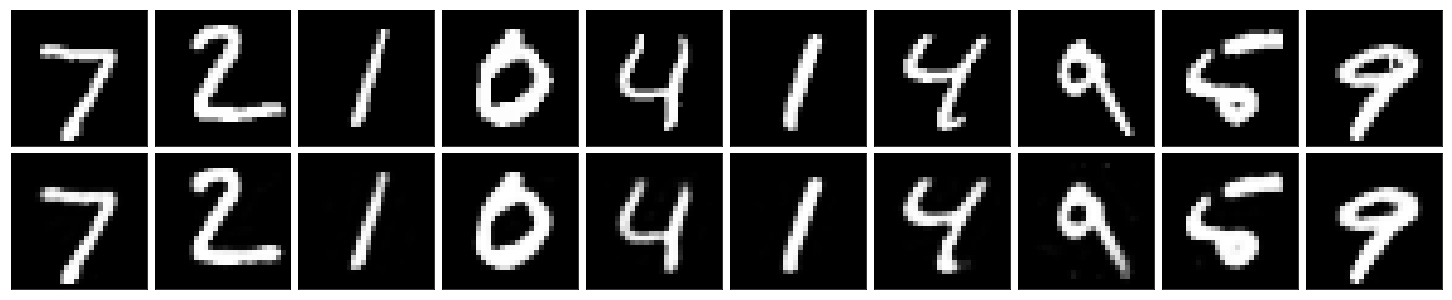

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [16]:
sess.close()